## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import re, nltk, spacy, string
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [2]:
# Importing libraries for text processing steps.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ingledarshan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ingledarshan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ingledarshan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ingledarshan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json')
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
f.close()
dtfr=pd.json_normalize(data)
# https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd

## Data preparation

To Inspect the dataframe, have used `dtfr.shape` to understand the dimensionality of the data present.

In [4]:
#Inspecting the data
# shape

(78313, 22)

In [5]:
# To understand the collumn data have used pd.set_option
pd.set_option('display.max_columns', None)

In [6]:
# Basic check of what the data looks like
# head

_index      _type      _id  _score   _source.tags  \
0  complaint-public-v2  complaint  3211475     0.0           None   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember   
2  complaint-public-v2  complaint  3199379     0.0           None   
3  complaint-public-v2  complaint  2673060     0.0           None   
4  complaint-public-v2  complaint  3203545     0.0           None   

  _source.zip_code _source.complaint_id                       _source.issue  \
0            90301              3211475   Attempts to collect debt not owed   
1            319XX              3229299     Written notification about debt   
2            77069              3199379  Other features, terms, or problems   
3            48066              2673060      Trouble during payment process   
4            10473              3203545                    Fees or interest   

       _source.date_received _source.state _source.consumer_disputed  \
0  2019-04-13T12:00:00-05:00            CA                       N/A   
1  2019-05-01T12:00:00-05:00            GA                       N/A   
2  2019-04-02T12:00:00-05:00            TX                       N/A   
3  2017-09-13T12:00:00-05:00            MI                       N/A   
4  2019-04-05T12:00:00-05:00            NY                       N/A   

               _source.product _source.company_response       _source.company  \
0              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
1              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
2  Credit card or prepaid card  Closed with explanation  JPMORGAN CHASE & CO.   
3                     Mortgage  Closed with explanation  JPMORGAN CHASE & CO.   
4  Credit card or prepaid card  Closed with explanation  JPMORGAN CHASE & CO.   

  _source.submitted_via _source.date_sent_to_company  \
0                   Web    2019-04-13T12:00:00-05:00   
1                   Web    2019-05-01T12:00:00-05:00   
2                   Web    2019-04-02T12:00:00-05:00   
3                   Web    2017-09-14T12:00:00-05:00   
4              Referral    2019-04-05T12:00:00-05:00   

  _source.company_public_response                         _source.sub_product  \
0                            None                            Credit card debt   
1                            None                            Credit card debt   
2                            None  General-purpose credit card or charge card   
3                            None                  Conventional home mortgage   
4                            None  General-purpose credit card or charge card   

  _source.timely                    _source.complaint_what_happened  \
0            Yes                                                      
1            Yes  Good morning my name is XXXX XXXX and I apprec...   
2            Yes  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3            Yes                                                      
4            Yes                                                      

                                  _source.sub_issue  \
0                                 Debt is not yours   
1  Didn't receive enough information to verify debt   
2             Problem with rewards from credit card   
3                                              None   
4                         Charged too much interest   

  _source.consumer_consent_provided  
0              Consent not provided  
1                  Consent provided  
2                  Consent provided  
3              Consent not provided  
4                               N/A

In [7]:
# Inspecting column info to get overall understanding about the collumns
# info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [8]:
#print the column names

# columns

Columns names:
 ['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code', '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state', '_source.consumer_disputed', '_source.product', '_source.company_response', '_source.company', '_source.submitted_via', '_source.date_sent_to_company', '_source.company_public_response', '_source.sub_product', '_source.timely', '_source.complaint_what_happened', '_source.sub_issue', '_source.consumer_consent_provided']


In [9]:
# Checking null value counts for each column.
# isna.sum

_index                                   0
_type                                    0
_id                                      0
_score                                   0
_source.tags                         67413
_source.zip_code                      6757
_source.complaint_id                     0
_source.issue                            0
_source.date_received                    0
_source.state                         1991
_source.consumer_disputed                0
_source.product                          0
_source.company_response                 0
_source.company                          0
_source.submitted_via                    0
_source.date_sent_to_company             0
_source.company_public_response      78309
_source.sub_product                  10571
_source.timely                           0
_source.complaint_what_happened          0
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [10]:
#Assign new column names





New column names:
 ['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id', 'issue', 'date_received', 'state', 'consumer_disputed', 'product', 'company_response', 'company', 'submitted_via', 'date_sent_to_company', 'company_public_response', 'sub_product', 'timely', 'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'] 



index       type       id  score           tags zip_code  \
0  complaint-public-v2  complaint  3211475    0.0           None    90301   
1  complaint-public-v2  complaint  3229299    0.0  Servicemember    319XX   
2  complaint-public-v2  complaint  3199379    0.0           None    77069   
3  complaint-public-v2  complaint  2673060    0.0           None    48066   
4  complaint-public-v2  complaint  3203545    0.0           None    10473   

  complaint_id                               issue              date_received  \
0      3211475   Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299     Written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379  Other features, terms, or problems  2019-04-02T12:00:00-05:00   
3      2673060      Trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                    Fees or interest  2019-04-05T12:00:00-05:00   

  state consumer_disputed                      product  \
0    CA               N/A              Debt collection   
1    GA               N/A              Debt collection   
2    TX               N/A  Credit card or prepaid card   
3    MI               N/A                     Mortgage   
4    NY               N/A  Credit card or prepaid card   

          company_response               company submitted_via  \
0  Closed with explanation  JPMORGAN CHASE & CO.           Web   
1  Closed with explanation  JPMORGAN CHASE & CO.           Web   
2  Closed with explanation  JPMORGAN CHASE & CO.           Web   
3  Closed with explanation  JPMORGAN CHASE & CO.           Web   
4  Closed with explanation  JPMORGAN CHASE & CO.      Referral   

        date_sent_to_company company_public_response  \
0  2019-04-13T12:00:00-05:00                    None   
1  2019-05-01T12:00:00-05:00                    None   
2  2019-04-02T12:00:00-05:00                    None   
3  2017-09-14T12:00:00-05:00                    None   
4  2019-04-05T12:00:00-05:00                    None   

                                  sub_product timely  \
0                            Credit card debt    Yes   
1                            Credit card debt    Yes   
2  General-purpose credit card or charge card    Yes   
3                  Conventional home mortgage    Yes   
4  General-purpose credit card or charge card    Yes   

                             complaint_what_happened  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                          sub_issue consumer_consent_provided  
0                                 Debt is not yours      Consent not provided  
1  Didn't receive enough information to verify debt          Consent provided  
2             Problem with rewards from credit card          Consent provided  
3                                              None      Consent not provided  
4                         Charged too much interest                       N/A

### Initial Observation from above Data Inspection
- Our primary column of interest is "complaint_what_happened". There seem to be some blanks in this column as well, which would render these rows useless for our use.
- These rows may be deleted.
- The column names have been updated to avoid any issues with existing dots (.) in the column names.
- Several of the other columns can be dropped, which shall be done in time.

In [11]:
# To Check no. of null values in "complaints_what_happened" column.


0

In [12]:
# Checking Number of rows with blank complaints
 
    
    

No. of rows with blank complaints:  57241


In [13]:
#Assign nan in place of blanks in the complaints column





No. of rows with nan in complaints column:  57241


In [14]:
# Number of rows with blank complaints after replacing with NaN





No. of rows with blank complaints:  0


In [15]:
#Remove all rows where complaints column is nan






New shape of dataframe: 


(21072, 22)

In [16]:
# Re-checking on dataframe again
dtfr.head()

index       type       id  score           tags zip_code  \
1   complaint-public-v2  complaint  3229299    0.0  Servicemember    319XX   
2   complaint-public-v2  complaint  3199379    0.0           None    77069   
10  complaint-public-v2  complaint  3233499    0.0           None    104XX   
11  complaint-public-v2  complaint  3180294    0.0           None    750XX   
14  complaint-public-v2  complaint  3224980    0.0           None    920XX   

   complaint_id                                 issue  \
1       3229299       Written notification about debt   
2       3199379    Other features, terms, or problems   
10      3233499  Incorrect information on your report   
11      3180294  Incorrect information on your report   
14      3224980                   Managing an account   

                date_received state consumer_disputed  \
1   2019-05-01T12:00:00-05:00    GA               N/A   
2   2019-04-02T12:00:00-05:00    TX               N/A   
10  2019-05-06T12:00:00-05:00    NY               N/A   
11  2019-03-14T12:00:00-05:00    TX               N/A   
14  2019-04-27T12:00:00-05:00    CA               N/A   

                                              product  \
1                                     Debt collection   
2                         Credit card or prepaid card   
10  Credit reporting, credit repair services, or o...   
11  Credit reporting, credit repair services, or o...   
14                        Checking or savings account   

           company_response               company submitted_via  \
1   Closed with explanation  JPMORGAN CHASE & CO.           Web   
2   Closed with explanation  JPMORGAN CHASE & CO.           Web   
10  Closed with explanation  JPMORGAN CHASE & CO.           Web   
11  Closed with explanation  JPMORGAN CHASE & CO.           Web   
14  Closed with explanation  JPMORGAN CHASE & CO.           Web   

         date_sent_to_company company_public_response  \
1   2019-05-01T12:00:00-05:00                    None   
2   2019-04-02T12:00:00-05:00                    None   
10  2019-05-06T12:00:00-05:00                    None   
11  2019-03-15T12:00:00-05:00                    None   
14  2019-04-27T12:00:00-05:00                    None   

                                   sub_product timely  \
1                             Credit card debt    Yes   
2   General-purpose credit card or charge card    Yes   
10              Other personal consumer report    Yes   
11                            Credit reporting    Yes   
14                            Checking account    Yes   

                              complaint_what_happened  \
1   Good morning my name is XXXX XXXX and I apprec...   
2   I upgraded my XXXX XXXX card in XX/XX/2018 and...   
10  Chase Card was reported on XX/XX/2019. However...   
11  On XX/XX/2018, while trying to book a XXXX  XX...   
14  my grand son give me check for {$1600.00} i de...   

                                           sub_issue consumer_consent_provided  
1   Didn't receive enough information to verify debt          Consent provided  
2              Problem with rewards from credit card          Consent provided  
10               Information belongs to someone else          Consent provided  
11               Information belongs to someone else          Consent provided  
14      Funds not handled or disbursed as instructed          Consent provided

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [17]:
# Write your function here to clean the text and remove all the unnecessary elements.
def text_preprocess(text):
    
    
    
    


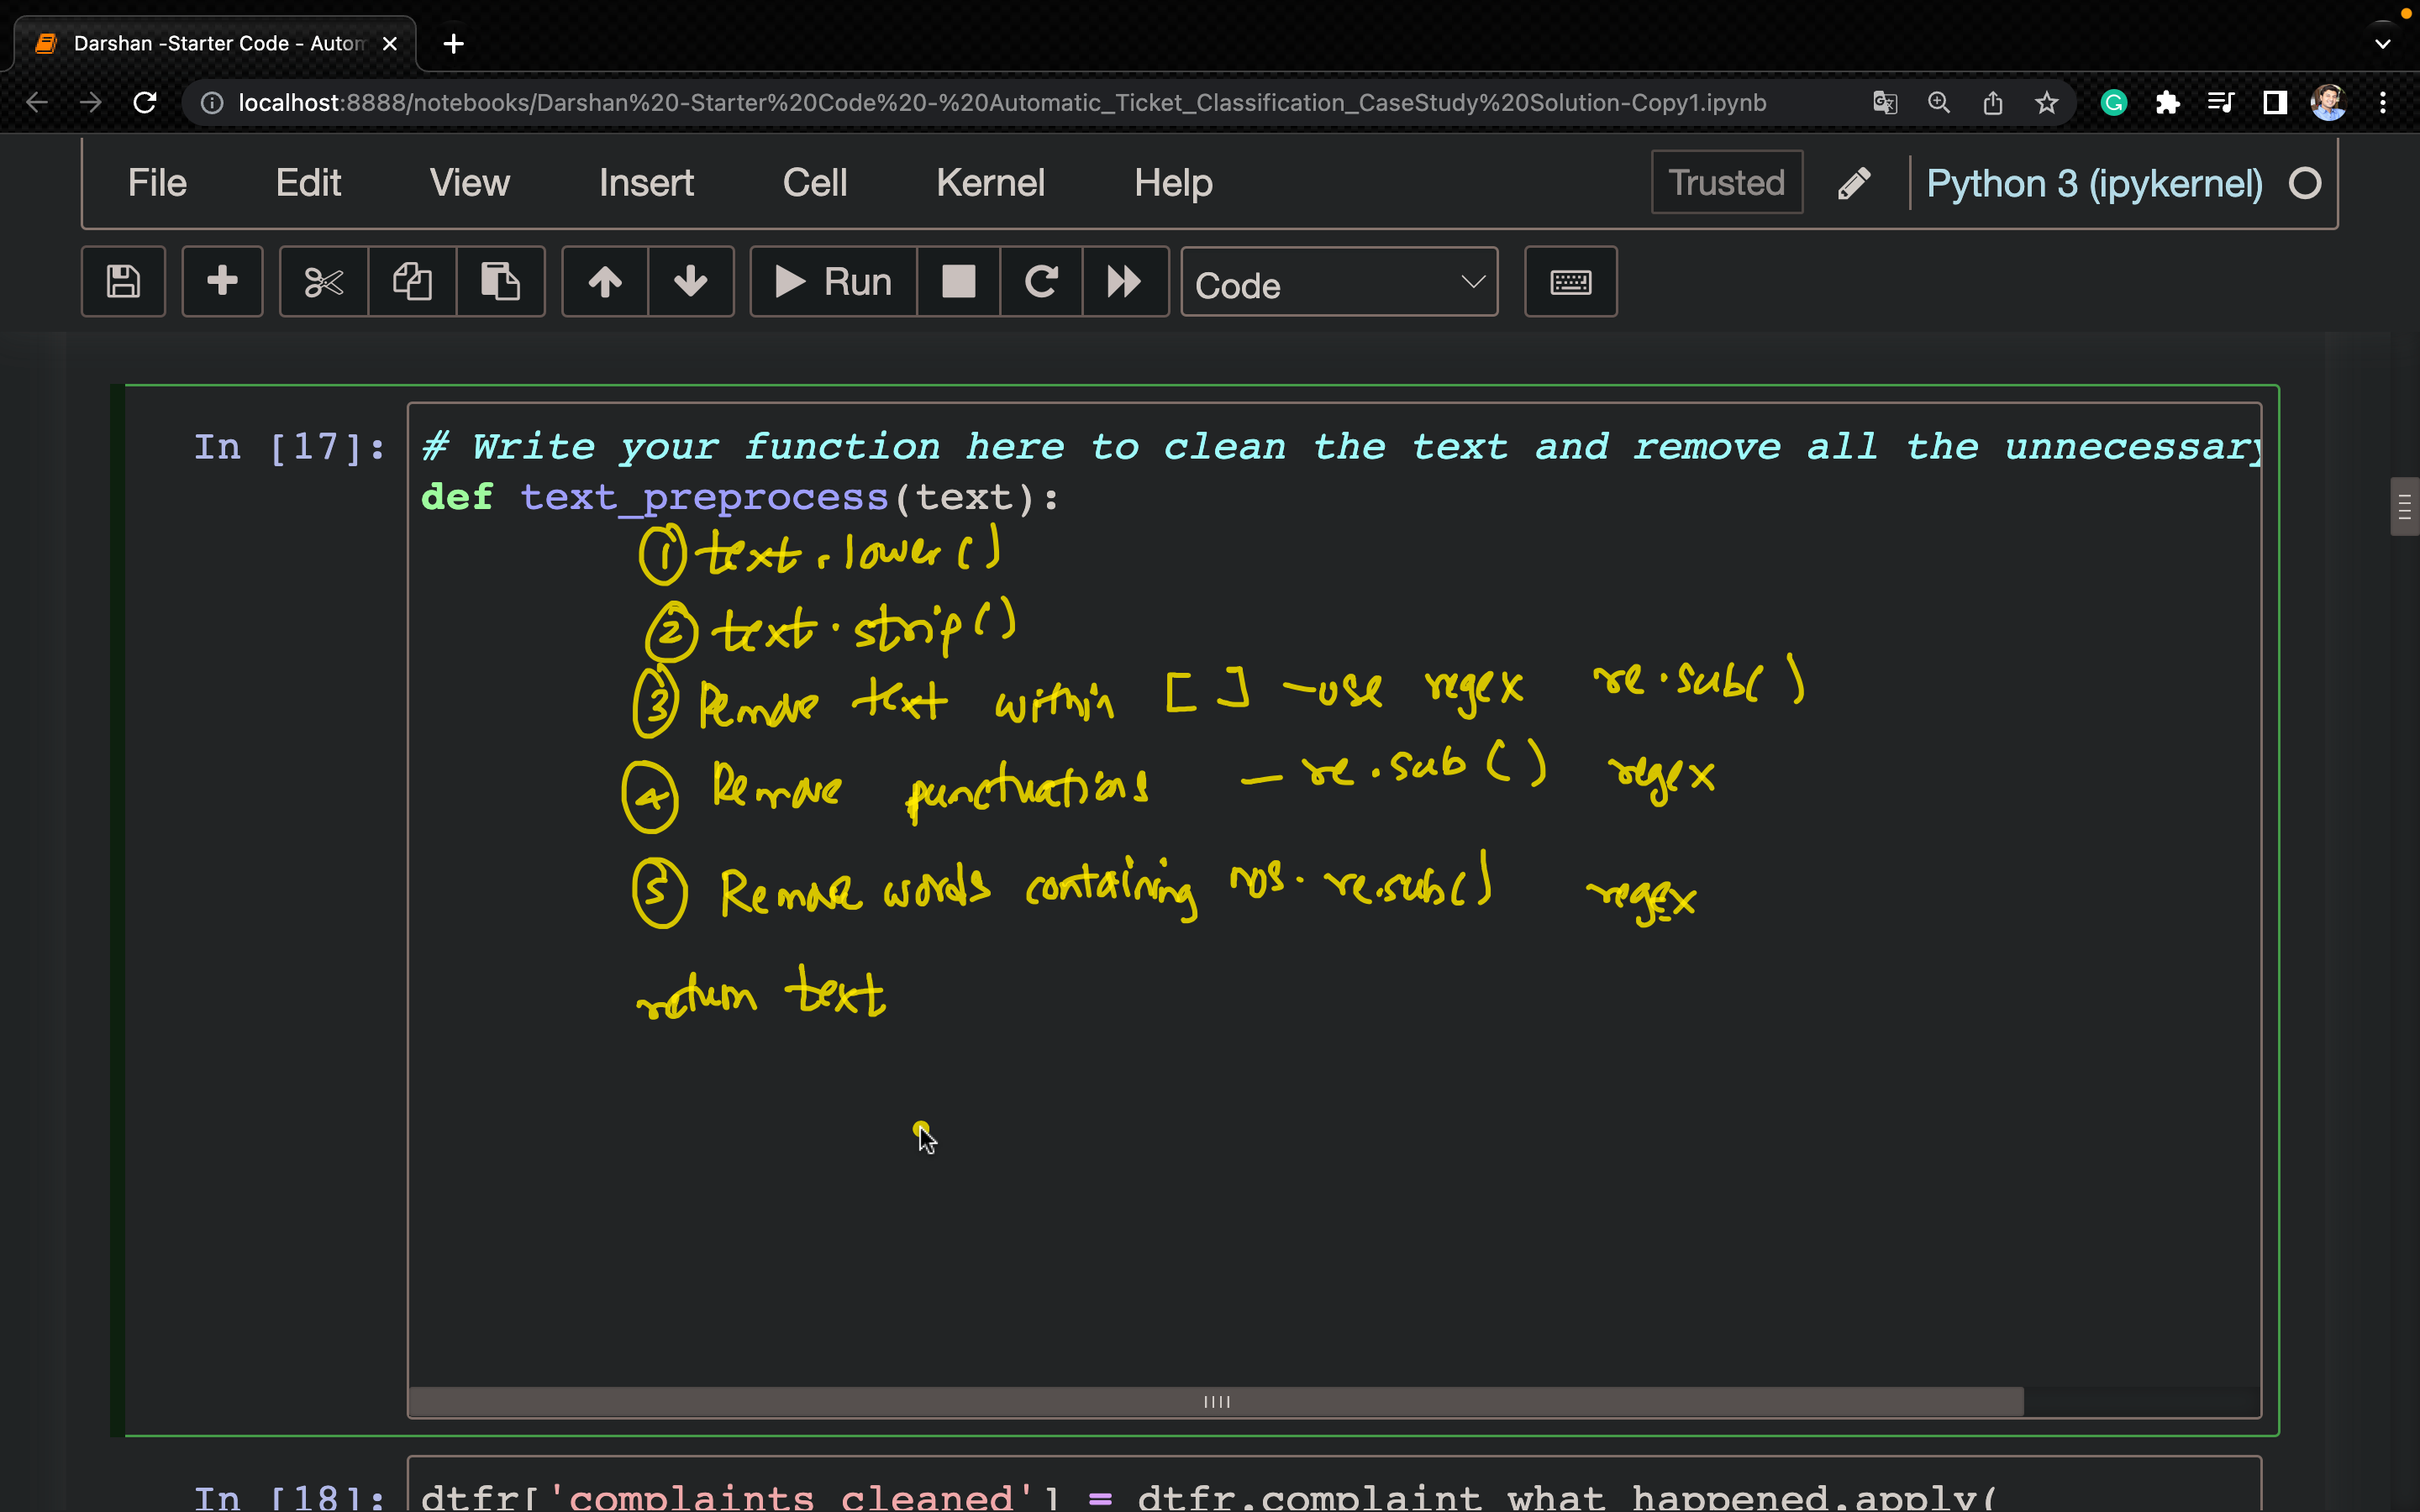

In [18]:
dtfr['complaints_cleaned'] = dtfr.complaint_what_happened.apply(
    text_preprocess)
dtfr.head()

index       type       id  score           tags zip_code  \
1   complaint-public-v2  complaint  3229299    0.0  Servicemember    319XX   
2   complaint-public-v2  complaint  3199379    0.0           None    77069   
10  complaint-public-v2  complaint  3233499    0.0           None    104XX   
11  complaint-public-v2  complaint  3180294    0.0           None    750XX   
14  complaint-public-v2  complaint  3224980    0.0           None    920XX   

   complaint_id                                 issue  \
1       3229299       Written notification about debt   
2       3199379    Other features, terms, or problems   
10      3233499  Incorrect information on your report   
11      3180294  Incorrect information on your report   
14      3224980                   Managing an account   

                date_received state consumer_disputed  \
1   2019-05-01T12:00:00-05:00    GA               N/A   
2   2019-04-02T12:00:00-05:00    TX               N/A   
10  2019-05-06T12:00:00-05:00    NY               N/A   
11  2019-03-14T12:00:00-05:00    TX               N/A   
14  2019-04-27T12:00:00-05:00    CA               N/A   

                                              product  \
1                                     Debt collection   
2                         Credit card or prepaid card   
10  Credit reporting, credit repair services, or o...   
11  Credit reporting, credit repair services, or o...   
14                        Checking or savings account   

           company_response               company submitted_via  \
1   Closed with explanation  JPMORGAN CHASE & CO.           Web   
2   Closed with explanation  JPMORGAN CHASE & CO.           Web   
10  Closed with explanation  JPMORGAN CHASE & CO.           Web   
11  Closed with explanation  JPMORGAN CHASE & CO.           Web   
14  Closed with explanation  JPMORGAN CHASE & CO.           Web   

         date_sent_to_company company_public_response  \
1   2019-05-01T12:00:00-05:00                    None   
2   2019-04-02T12:00:00-05:00                    None   
10  2019-05-06T12:00:00-05:00                    None   
11  2019-03-15T12:00:00-05:00                    None   
14  2019-04-27T12:00:00-05:00                    None   

                                   sub_product timely  \
1                             Credit card debt    Yes   
2   General-purpose credit card or charge card    Yes   
10              Other personal consumer report    Yes   
11                            Credit reporting    Yes   
14                            Checking account    Yes   

                              complaint_what_happened  \
1   Good morning my name is XXXX XXXX and I apprec...   
2   I upgraded my XXXX XXXX card in XX/XX/2018 and...   
10  Chase Card was reported on XX/XX/2019. However...   
11  On XX/XX/2018, while trying to book a XXXX  XX...   
14  my grand son give me check for {$1600.00} i de...   

                                           sub_issue  \
1   Didn't receive enough information to verify debt   
2              Problem with rewards from credit card   
10               Information belongs to someone else   
11               Information belongs to someone else   
14      Funds not handled or disbursed as instructed   

   consumer_consent_provided  \
1           Consent provided   
2           Consent provided   
10          Consent provided   
11          Consent provided   
14          Consent provided   

                                   complaints_cleaned  
1   good morning my name is xxxx xxxx and i apprec...  
2   i upgraded my xxxx xxxx card in  and was told ...  
10  chase card was reported on  however fraudulent...  
11  on  while trying to book a xxxx  xxxx  ticket ...  
14  my grand son give me check for  i deposit it i...

In [19]:
dtfr_clean = dtfr.complaints_cleaned.to_frame()
dtfr_clean.columns = ["complaints"]
dtfr_clean.head()

complaints
1   good morning my name is xxxx xxxx and i apprec...
2   i upgraded my xxxx xxxx card in  and was told ...
10  chase card was reported on  however fraudulent...
11  on  while trying to book a xxxx  xxxx  ticket ...
14  my grand son give me check for  i deposit it i...

In [20]:
#Write your function to Lemmatize the texts
def text_lemma(text):     
        
    
    
    
    
    
    
    
    
    
    
    
    
    


In [21]:
# Add a column for lemmatized complaints to the dataframe
dtfr["lemmatized_complaint"] = dtfr.apply(
    lambda x: text_lemma(x['complaint_what_happened']), axis=1)

# View the dataframe
dtfr.head()

index       type       id  score           tags zip_code  \
1   complaint-public-v2  complaint  3229299    0.0  Servicemember    319XX   
2   complaint-public-v2  complaint  3199379    0.0           None    77069   
10  complaint-public-v2  complaint  3233499    0.0           None    104XX   
11  complaint-public-v2  complaint  3180294    0.0           None    750XX   
14  complaint-public-v2  complaint  3224980    0.0           None    920XX   

   complaint_id                                 issue  \
1       3229299       Written notification about debt   
2       3199379    Other features, terms, or problems   
10      3233499  Incorrect information on your report   
11      3180294  Incorrect information on your report   
14      3224980                   Managing an account   

                date_received state consumer_disputed  \
1   2019-05-01T12:00:00-05:00    GA               N/A   
2   2019-04-02T12:00:00-05:00    TX               N/A   
10  2019-05-06T12:00:00-05:00    NY               N/A   
11  2019-03-14T12:00:00-05:00    TX               N/A   
14  2019-04-27T12:00:00-05:00    CA               N/A   

                                              product  \
1                                     Debt collection   
2                         Credit card or prepaid card   
10  Credit reporting, credit repair services, or o...   
11  Credit reporting, credit repair services, or o...   
14                        Checking or savings account   

           company_response               company submitted_via  \
1   Closed with explanation  JPMORGAN CHASE & CO.           Web   
2   Closed with explanation  JPMORGAN CHASE & CO.           Web   
10  Closed with explanation  JPMORGAN CHASE & CO.           Web   
11  Closed with explanation  JPMORGAN CHASE & CO.           Web   
14  Closed with explanation  JPMORGAN CHASE & CO.           Web   

         date_sent_to_company company_public_response  \
1   2019-05-01T12:00:00-05:00                    None   
2   2019-04-02T12:00:00-05:00                    None   
10  2019-05-06T12:00:00-05:00                    None   
11  2019-03-15T12:00:00-05:00                    None   
14  2019-04-27T12:00:00-05:00                    None   

                                   sub_product timely  \
1                             Credit card debt    Yes   
2   General-purpose credit card or charge card    Yes   
10              Other personal consumer report    Yes   
11                            Credit reporting    Yes   
14                            Checking account    Yes   

                              complaint_what_happened  \
1   Good morning my name is XXXX XXXX and I apprec...   
2   I upgraded my XXXX XXXX card in XX/XX/2018 and...   
10  Chase Card was reported on XX/XX/2019. However...   
11  On XX/XX/2018, while trying to book a XXXX  XX...   
14  my grand son give me check for {$1600.00} i de...   

                                           sub_issue  \
1   Didn't receive enough information to verify debt   
2              Problem with rewards from credit card   
10               Information belongs to someone else   
11               Information belongs to someone else   
14      Funds not handled or disbursed as instructed   

   consumer_consent_provided  \
1           Consent provided   
2           Consent provided   
10          Consent provided   
11          Consent provided   
14          Consent provided   

                                   complaints_cleaned  \
1   good morning my name is xxxx xxxx and i apprec...   
2   i upgraded my xxxx xxxx card in  and was told ...   
10  chase card was reported on  however fraudulent...   
11  on  while trying to book a xxxx  xxxx  ticket ...   
14  my grand son give me check for  i deposit it i...   

                                 lemmatized_complaint  
1   good morning my name be xxxx xxxx and I apprec...  
2   I upgrade my xxxx xxxx card in XX / XX/2018 an...  
10  Chase Card be report on XX / XX/2019 . howe

In [22]:
#Create a dataframe('df_clean') that will have only 
# the complaints and the lemmatized complaints
dtfr_clean = dtfr[['complaint_what_happened', 'lemmatized_complaint']]

In [23]:
dtfr_clean.head()

complaint_what_happened  \
1   Good morning my name is XXXX XXXX and I apprec...   
2   I upgraded my XXXX XXXX card in XX/XX/2018 and...   
10  Chase Card was reported on XX/XX/2019. However...   
11  On XX/XX/2018, while trying to book a XXXX  XX...   
14  my grand son give me check for {$1600.00} i de...   

                                 lemmatized_complaint  
1   good morning my name be xxxx xxxx and I apprec...  
2   I upgrade my xxxx xxxx card in XX / XX/2018 an...  
10  Chase Card be report on XX / XX/2019 . however...  
11  on XX / xx/2018 , while try to book a xxxx   x...  
14  my grand son give I check for { $ 1600.00 } I ...

From the above data exploration it is observed that, the words of interest for Topic Modelling are nouns and proper nouns. Words with other POS tags are will not be of much use to us. Hence, writing the code that creates a new column which includes only words with POS tags as nouns and proper noun.

In [24]:
#Write your function to extract the POS tags 

nlp = spacy.load("en_core_web_sm")

from tqdm import tqdm














100%|█████████████████████████████████████| 21072/21072 [06:26<00:00, 54.50it/s]


In [25]:
dtfr_clean['pos_tags_lemmatized'] = pd.Series(pos_tags, index=dtfr_clean.index)
dtfr_clean['complaints_nouns_only'] = pd.Series(nouns, index=dtfr_clean.index)

#Reassigning index of cleaned dataframe
dtfr_clean.reset_index(drop=True, inplace=True)

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/4131034220.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/4131034220.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#The clean dataframe should now contain the raw complaint, 
# cleaned_complaints, lemmatized complaints with respective POS tags, 
#and the complaints after removing words with 
# non-noun (NOUN, PROPN) POS tags.
dtfr_clean.head()

complaint_what_happened  \
0  Good morning my name is XXXX XXXX and I apprec...   
1  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
2  Chase Card was reported on XX/XX/2019. However...   
3  On XX/XX/2018, while trying to book a XXXX  XX...   
4  my grand son give me check for {$1600.00} i de...   

                                lemmatized_complaint  \
0  good morning my name be xxxx xxxx and I apprec...   
1  I upgrade my xxxx xxxx card in XX / XX/2018 an...   
2  Chase Card be report on XX / XX/2019 . however...   
3  on XX / xx/2018 , while try to book a xxxx   x...   
4  my grand son give I check for { $ 1600.00 } I ...   

                                 pos_tags_lemmatized  \
0  ADJ NOUN PRON NOUN AUX PROPN PROPN CCONJ PRON ...   
1  PRON VERB PRON PROPN PROPN NOUN ADP PROPN SYM ...   
2  PROPN PROPN AUX NOUN ADP PROPN SYM PROPN PUNCT...   
3  ADP PROPN SYM PROPN PUNCT SCONJ VERB PART VERB...   
4  PRON ADJ NOUN VERB PRON VERB ADP PUNCT SYM NUM...   

                               complaints_nouns_only  
0  morning name xxxx xxxx stop chase bank cardmem...  
1  xxxx xxxx card xx xx/2018 agent anniversary da...  
2  chase card report xx xx/2019 application ident...  
3  xx xx/2018 xxxx xxxx ticket offer ticket rewar...  
4  son chase account fund chase bank account mone...

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [27]:
dtfr_clean.compl_wat_hpnd.str.len().sort_val(asc=F)


436      31611
11241    31385
14251    29948
2308     29239
1130     25757
         ...  
16450       21
8825        21
1619        20
5799        19
8697        19
Name: complaint_what_happened, Length: 21072, dtype: int64

Text(0.5, 0, 'Character length ranges')

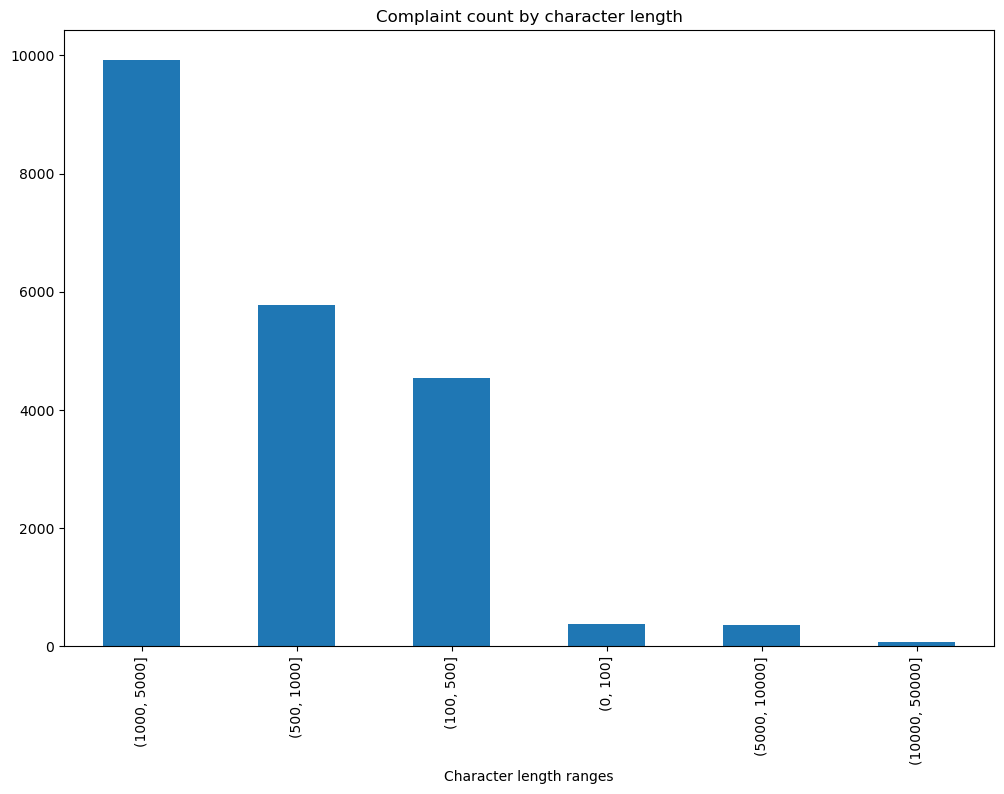

In [28]:
# Write your code here to visualise the data according to the
# 'Complaint' character length





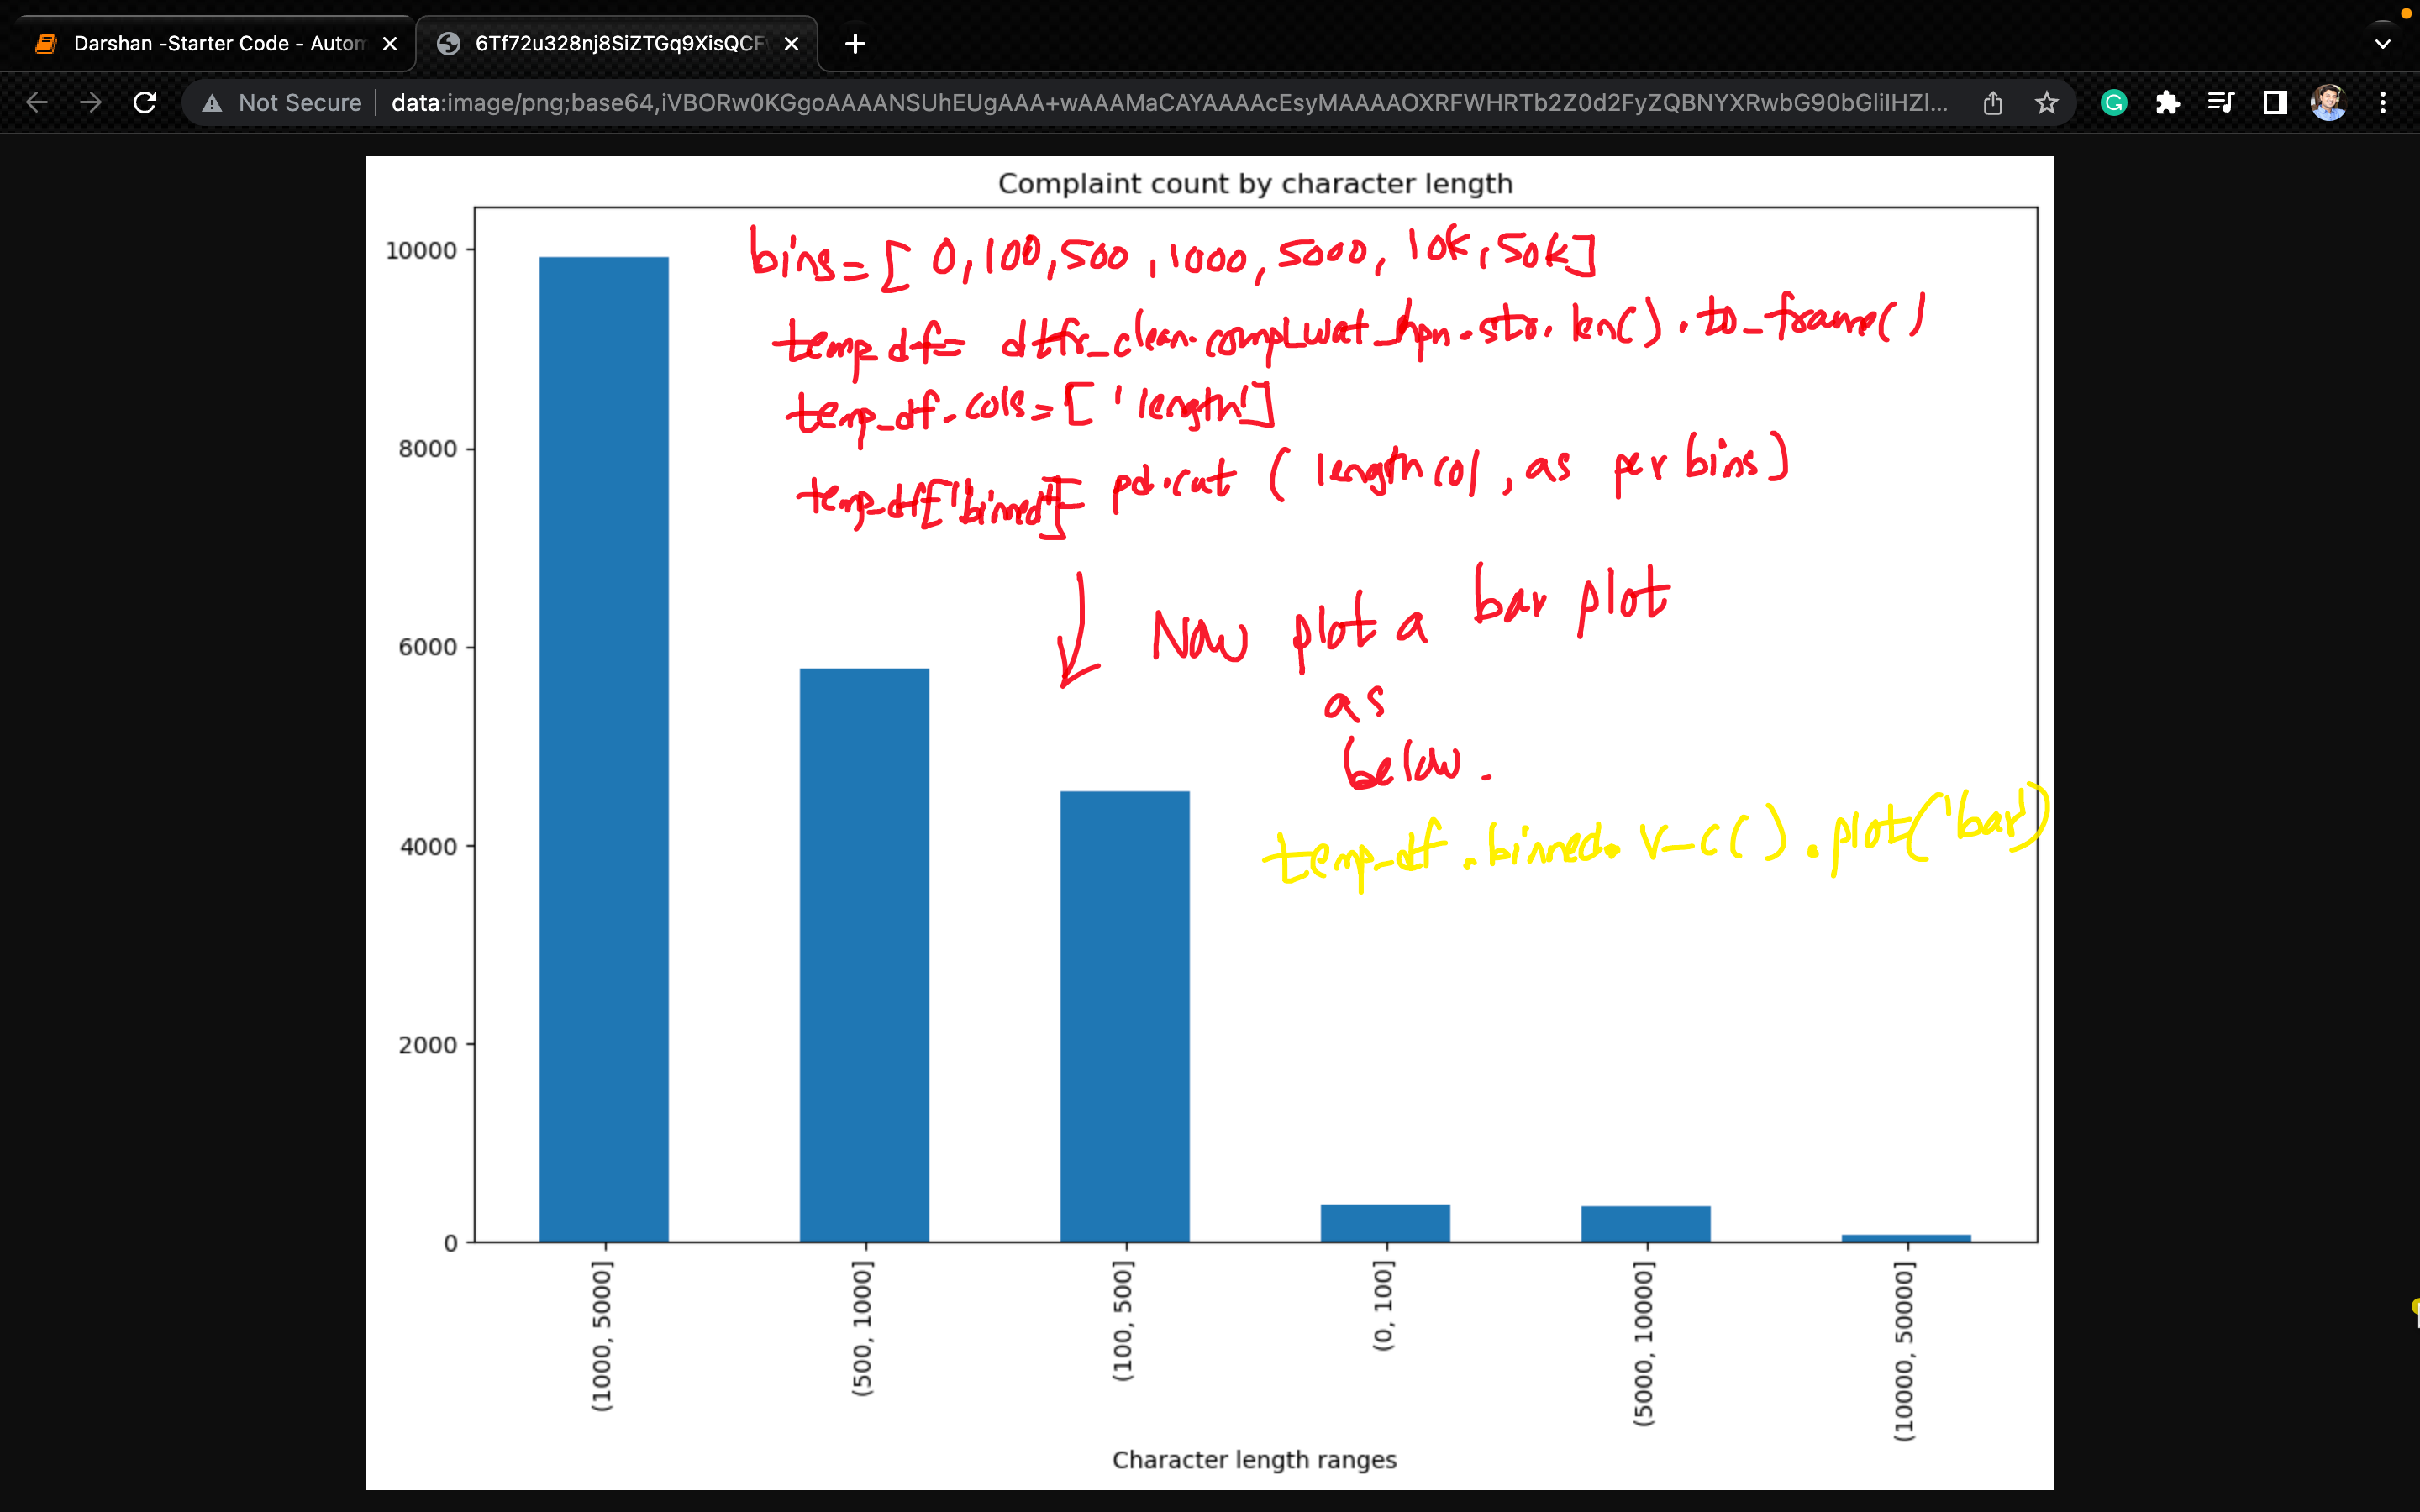

### Find the top 40 words by frequency among all the articles after processing the text.

Text(0.5, 1.0, 'Most frequent words in complaints after processing')

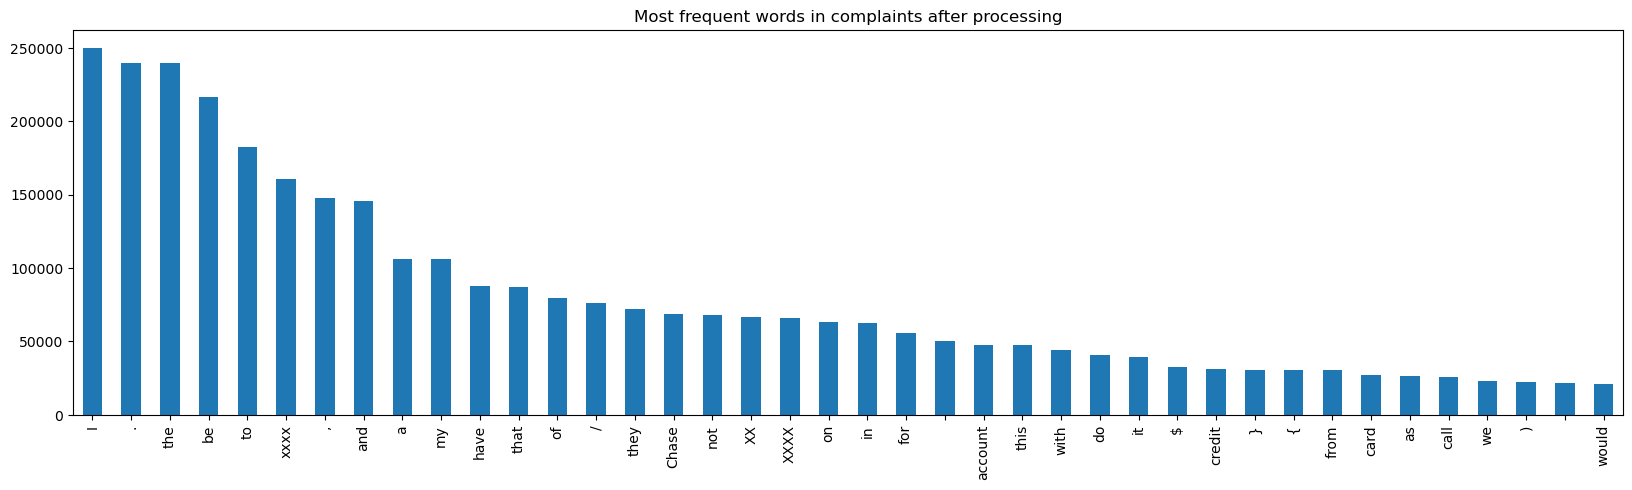

In [29]:
#Using a word cloud find the top 40 words by frequency among all the
# articles after processing the text













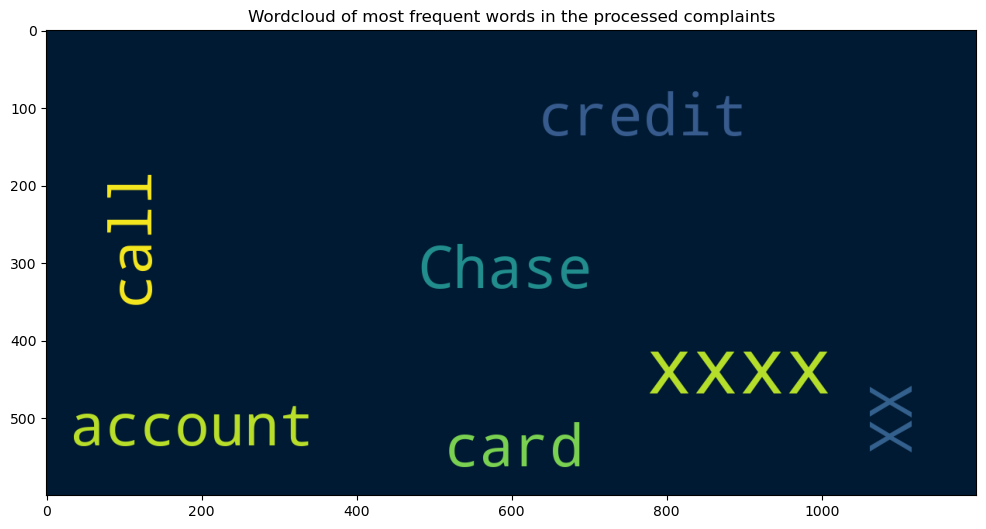

In [30]:
#Using a word cloud find the top 40 words by frequency
# among all the articles after processing the text
from wordcloud import WordCloud

















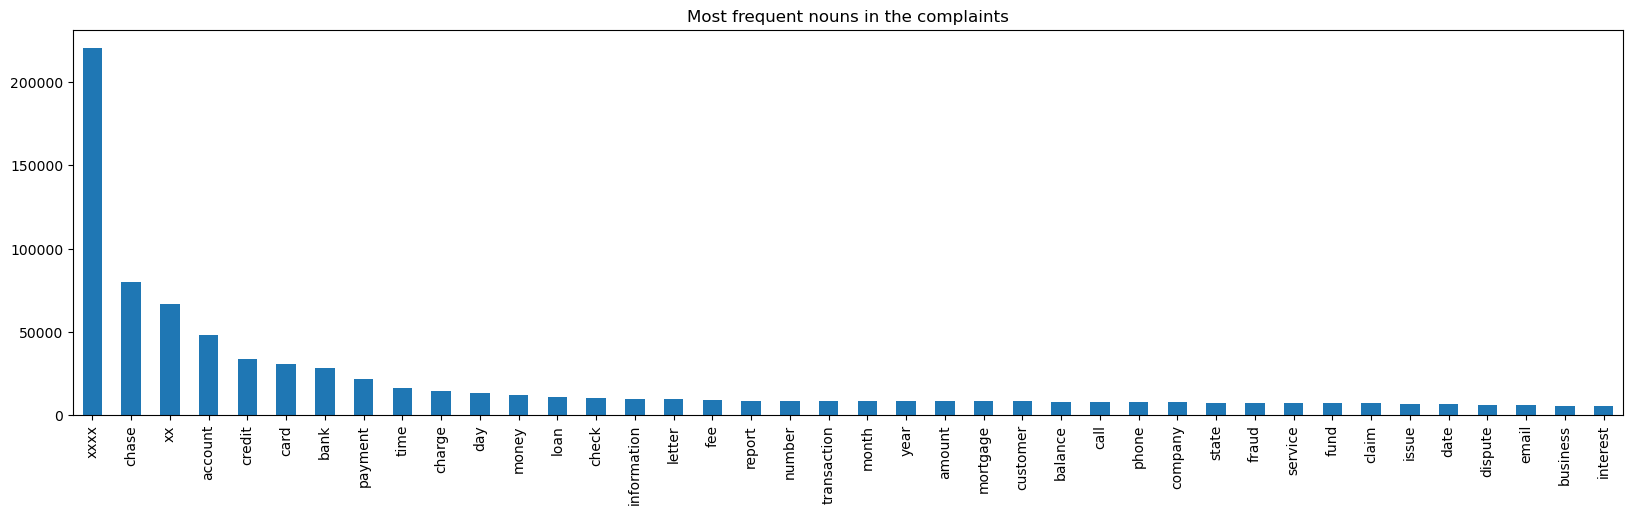

In [31]:
# Most frequent nouns in the processed complaints















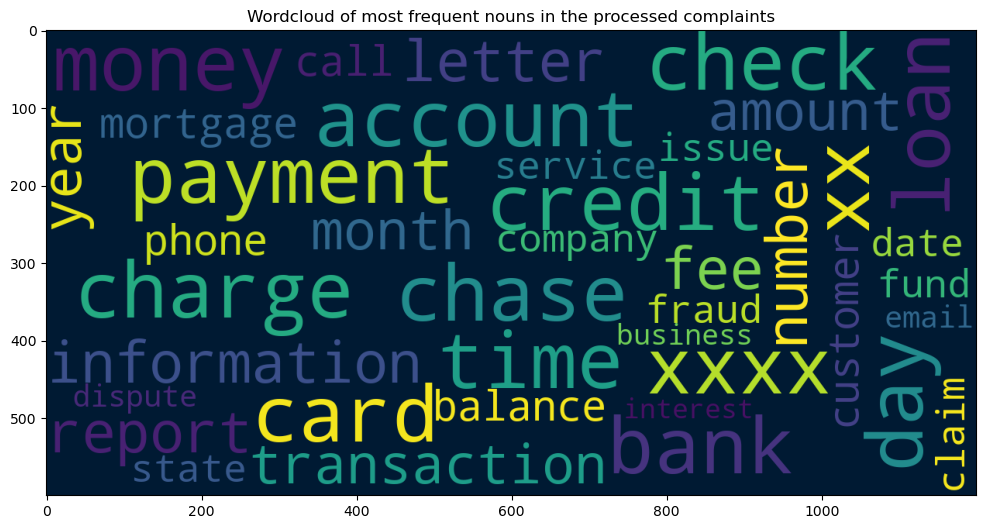

In [32]:
#Using a word cloud find the top 40 nouns by frequency among all the articles 
# after processing the text



















### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [33]:
# Importing required libraries.
from nltk.util import ngrams 
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

In [34]:
#Write your code here to find the top 30 unigram frequency among the complaints
# in the cleaned datafram(df_clean).













In [35]:
#Print the top 30 words in the unigram by frequency
print("Top 30 words in the unigram by frequency:")
unigram_df.sort_values(by="frequency", ascending = False).head(30)

Top 30 words in the unigram by frequency:


frequency
xxxx            222221
chase            80157
xx               76921
account          47923
credit           33725
card             30403
bank             28119
payment          21322
time             16258
charge           14581
day              13231
money            12000
loan             10985
check            10436
information       9685
letter            9654
fee               8914
report            8655
number            8649
transaction       8617
month             8520
year              8433
amount            8414
mortgage          8207
customer          8192
balance           7791
call              7664
phone             7655
company           7642
state             7257

<Figure size 2000x500 with 0 Axes>

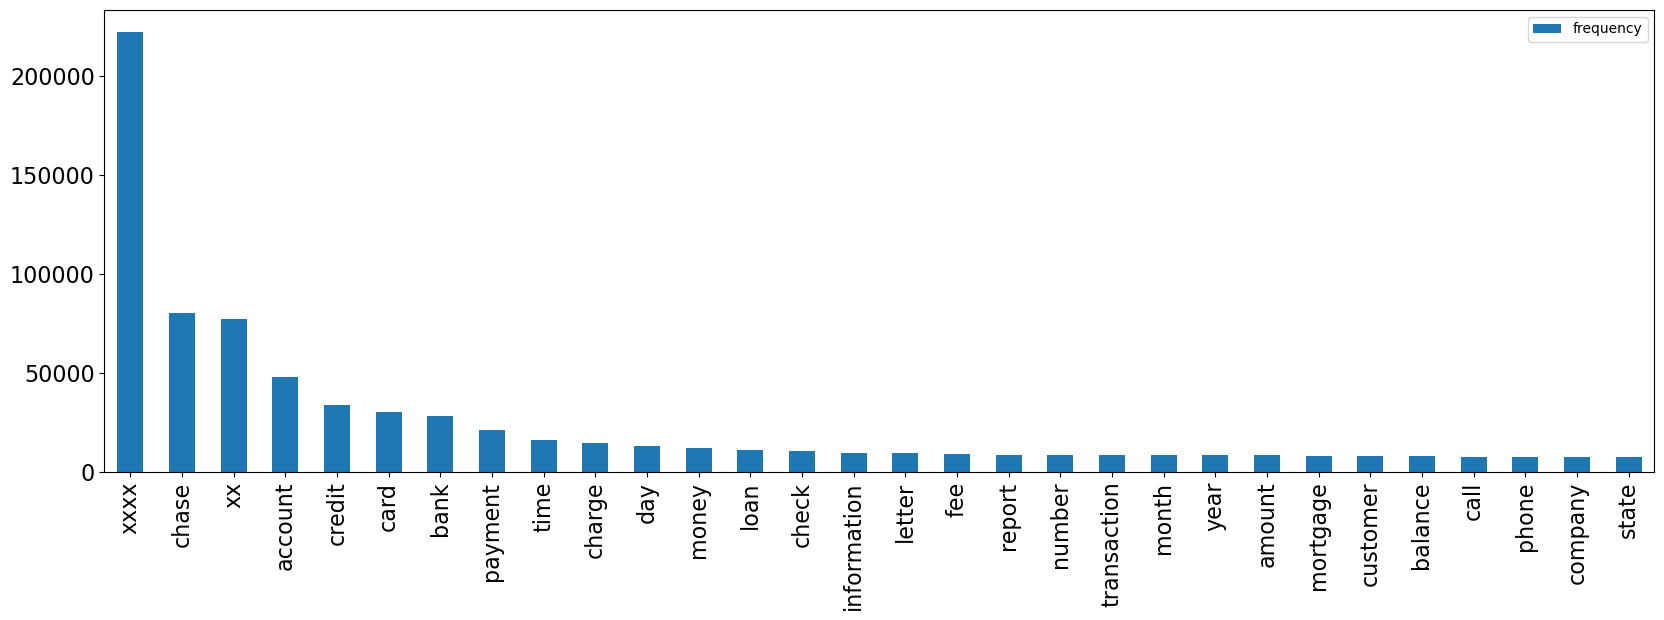

In [36]:






# Plotted the above using .plot(bar)



In [37]:
#Write your code here to find the top 30 bigram frequency among 
# the complaints in the cleaned datafram(df_clean).


# ngramrng=(2,2)










Top 30 bigrams by frequency:
                  frequency
xxxx xxxx             94005
xx xx                 38116
xx xxxx               28086
chase bank            12901
credit card           12776
xxxx chase             8765
xxxx xx                7282
chase xxxx             4382
credit report          3945
account chase          3866
account xxxx           3670
xxxx account           3589
chase credit           3548
checking account       3530
customer service       3079
xxxx credit            3009
chase account          2857
xx 2020                2857
jp morgan              2713
bank account           2666
xxxx payment           2592
morgan chase           2563
bank xxxx              2264
xx 2019                2131
card xxxx              2074
debit card             1972
card chase             1886
account account        1864
payment xxxx           1834
xx 2018                1831


<Figure size 2000x500 with 0 Axes>

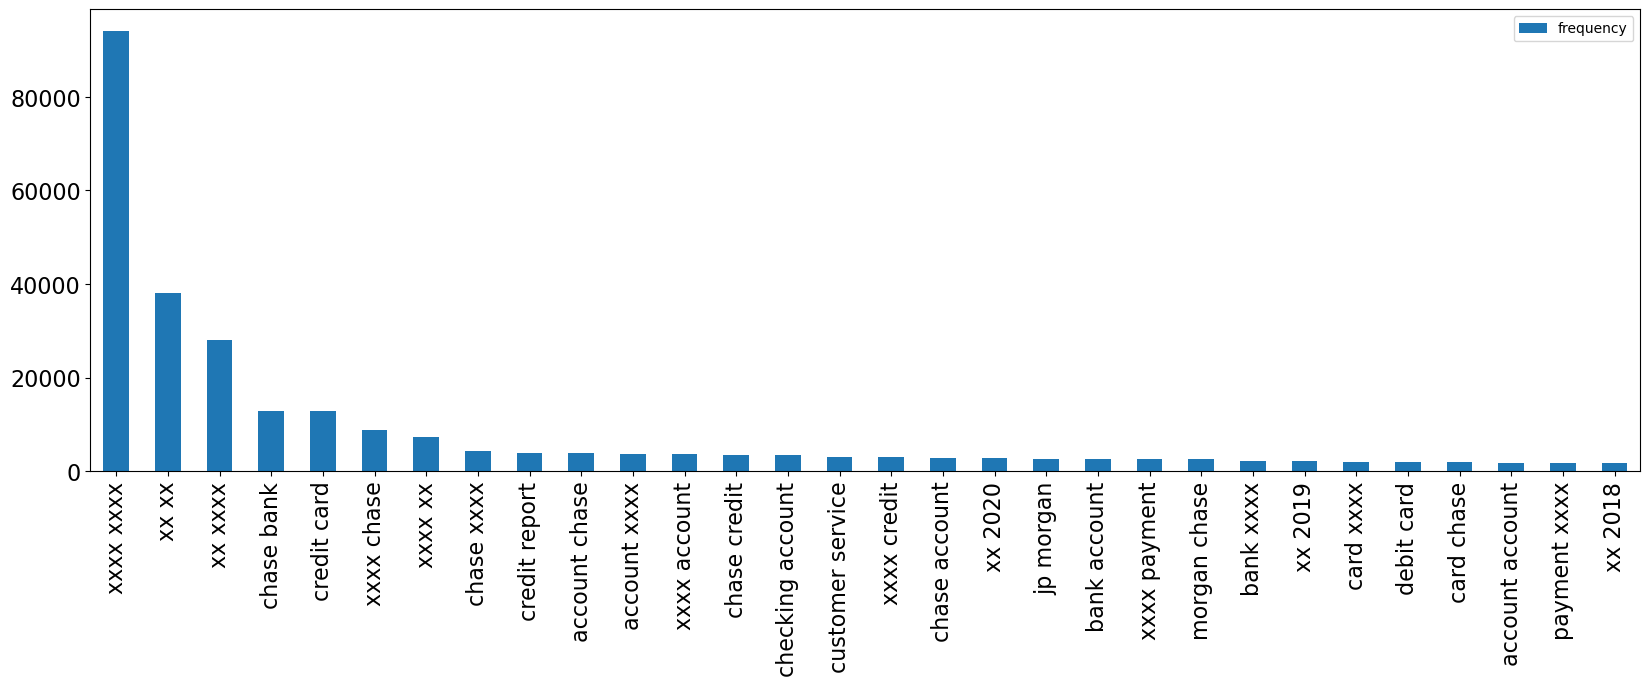

In [38]:
#Print the lemmatized_complaints 10 words in the bigram frequency












In [39]:
#Write your code here to find the top 30 trigram frequency among
# the complaints in the cleaned datafram(df_clean).

# ngrrng=3,3














Top 30 trigrams by frequency:
                     frequency
xxxx xxxx xxxx           46336
xx xx xxxx               27648
xxxx xx xx                7239
xx xxxx xxxx              3754
xx xxxx xx                3163
xxxx xxxx chase           3017
xx xx 2020                2848
xx xxxx chase             2430
chase credit card         2383
jp morgan chase           2225
xx xx 2019                2110
xxxx xxxx xx              2064
xx xx 2018                1822
chase xxxx xxxx           1722
date xx xx                1633
account xxxx xxxx         1509
account xx xx             1480
xxxx credit card          1390
chase bank xxxx           1358
xxxx chase bank           1358
xxxx xxxx account         1294
chase xx xx               1158
bank xxxx xxxx            1145
credit card account       1033
xxxx xxxx credit           993
name xxxx xxxx             981
credit card company        976
payment xx xx              970
credit card chase          924
account chase bank         858


<Figure size 2000x500 with 0 Axes>

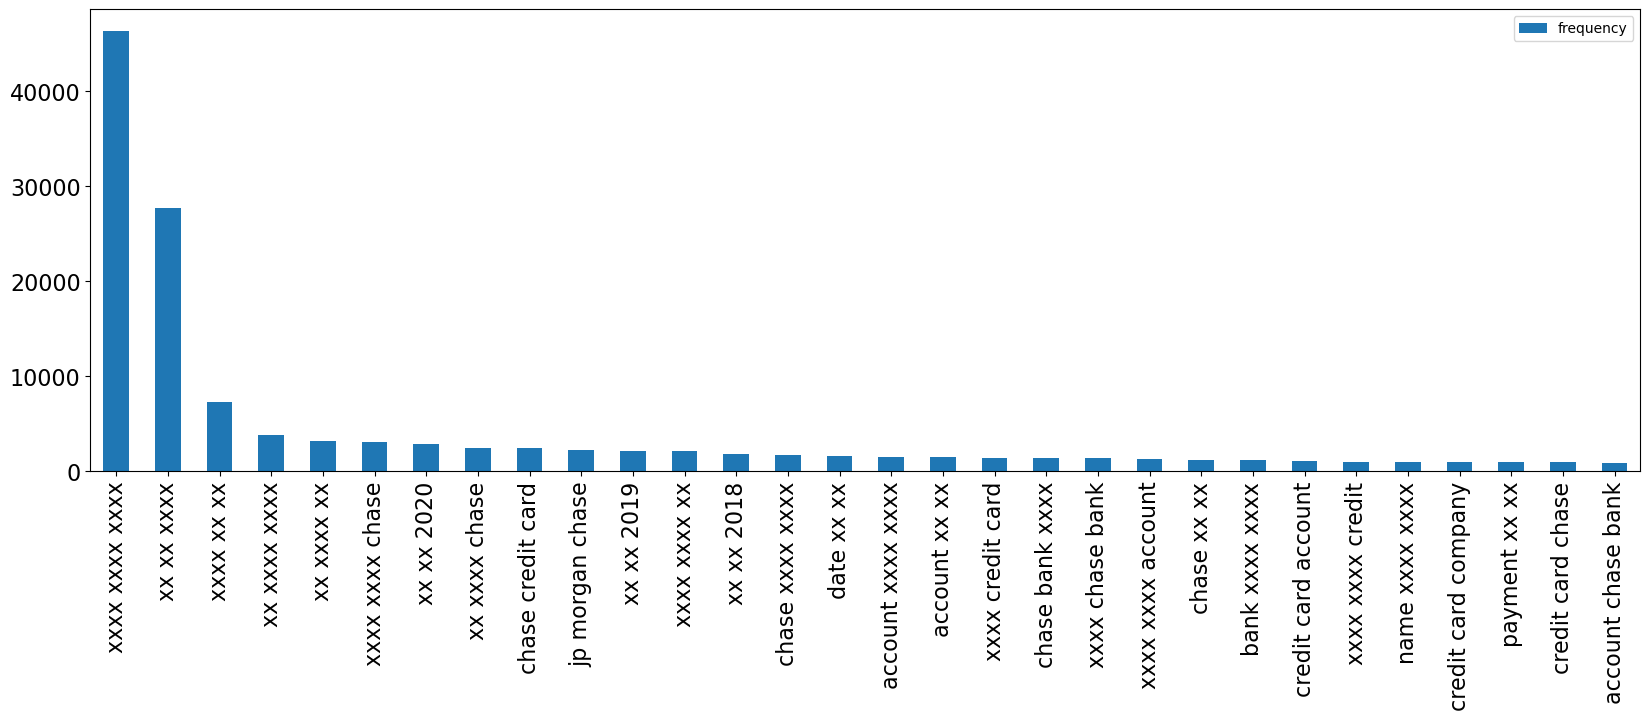

In [40]:
#Print the top 30 words in the trigram frequency














### The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [41]:
dtfr_clean.head()

complaint_what_happened  \
0  Good morning my name is XXXX XXXX and I apprec...   
1  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
2  Chase Card was reported on XX/XX/2019. However...   
3  On XX/XX/2018, while trying to book a XXXX  XX...   
4  my grand son give me check for {$1600.00} i de...   

                                lemmatized_complaint  \
0  good morning my name be xxxx xxxx and I apprec...   
1  I upgrade my xxxx xxxx card in XX / XX/2018 an...   
2  Chase Card be report on XX / XX/2019 . however...   
3  on XX / xx/2018 , while try to book a xxxx   x...   
4  my grand son give I check for { $ 1600.00 } I ...   

                                 pos_tags_lemmatized  \
0  ADJ NOUN PRON NOUN AUX PROPN PROPN CCONJ PRON ...   
1  PRON VERB PRON PROPN PROPN NOUN ADP PROPN SYM ...   
2  PROPN PROPN AUX NOUN ADP PROPN SYM PROPN PUNCT...   
3  ADP PROPN SYM PROPN PUNCT SCONJ VERB PART VERB...   
4  PRON ADJ NOUN VERB PRON VERB ADP PUNCT SYM NUM...   

                               complaints_nouns_only  
0  morning name xxxx xxxx stop chase bank cardmem...  
1  xxxx xxxx card xx xx/2018 agent anniversary da...  
2  chase card report xx xx/2019 application ident...  
3  xx xx/2018 xxxx xxxx ticket offer ticket rewar...  
4  son chase account fund chase bank account mone...

In [42]:
# Removing masked customer names and other masked data signified by 'xxxx', 
# since they are of no use to us.
dtfr_clean['lemmatized_complaint'] = dtfr_clean[
    'lemmatized_complaint'].str.replace('xxxx', '')
dtfr_clean['complaints_nouns_only'] = dtfr_clean[
    'complaints_nouns_only'].str.replace('xxxx', '')

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/1079500078.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/1079500078.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
#All masked texts has been removed
dtfr_clean.head()

complaint_what_happened  \
0  Good morning my name is XXXX XXXX and I apprec...   
1  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
2  Chase Card was reported on XX/XX/2019. However...   
3  On XX/XX/2018, while trying to book a XXXX  XX...   
4  my grand son give me check for {$1600.00} i de...   

                                lemmatized_complaint  \
0  good morning my name be   and I appreciate it ...   
1  I upgrade my   card in XX / XX/2018 and be tel...   
2  Chase Card be report on XX / XX/2019 . however...   
3  on XX / xx/2018 , while try to book a       ti...   
4  my grand son give I check for { $ 1600.00 } I ...   

                                 pos_tags_lemmatized  \
0  ADJ NOUN PRON NOUN AUX PROPN PROPN CCONJ PRON ...   
1  PRON VERB PRON PROPN PROPN NOUN ADP PROPN SYM ...   
2  PROPN PROPN AUX NOUN ADP PROPN SYM PROPN PUNCT...   
3  ADP PROPN SYM PROPN PUNCT SCONJ VERB PART VERB...   
4  PRON ADJ NOUN VERB PRON VERB ADP PUNCT SYM NUM...   

                               complaints_nouns_only  
0  morning name   stop chase bank cardmember serv...  
1    card xx xx/2018 agent anniversary date agent...  
2  chase card report xx xx/2019 application ident...  
3  xx xx/2018   ticket offer ticket reward card i...  
4  son chase account fund chase bank account mone...

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [44]:
#Write your code here to initialise the TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer



# max_features=5000
# ngramrange=(1,3)





#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [45]:
#Write your code here to create the Document Term Matrix by 
# transforming the complaints column present in df_clean.


# tfidf = tfidf_vect.fit_tr(nounns only col)
# feat = tfidf_vect.get_feature_names()





# tfidf_df = pd.DF(tfidf.toarray(), col='feat')
# head


15   16   17   18  18 xx  18 xx xx   19  19 chase  19 pandemic  1st   20  \
0  0.0  0.0  0.0  0.0    0.0       0.0  0.0       0.0          0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0    0.0       0.0  0.0       0.0          0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0    0.0       0.0  0.0       0.0          0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0    0.0       0.0  0.0       0.0          0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0    0.0       0.0  0.0       0.0          0.0  0.0  0.0   

   20 xx  20 xx xx  2015  2015 chase  2016  2016 chase  2017  2017 chase  \
0    0.0       0.0   0.0         0.0   0.0         0.0   0.0         0.0   
1    0.0       0.0   0.0         0.0   0.0         0.0   0.0         0.0   
2    0.0       0.0   0.0         0.0   0.0         0.0   0.0         0.0   
3    0.0       0.0   0.0         0.0   0.0         0.0   0.0         0.0   
4    0.0       0.0   0.0         0.0   0.0         0.0   0.0         0.0   

       2018  2018 chase  2018 chase bank  2018 credit  2018 xx  2018 xx xx  \
0  0.000000         0.0              0.0          0.0      0.0         0.0   
1  0.134974         0.0              0.0          0.0      0.0         0.0   
2  0.000000         0.0              0.0          0.0      0.0         0.0   
3  0.229881         0.0              0.0          0.0      0.0         0.0   
4  0.115004         0.0              0.0          0.0      0.0         0.0   

       2019  2019 account  2019 chase  2019 chase bank  2019 credit  \
0  0.000000           0.0         0.0              0.0          0.0   
1  0.000000           0.0         0.0              0.0          0.0   
2  0.205283           0.0         0.0              0.0          0.0   
3  0.000000           0.0         0.0              0.0          0.0   
4  0.000000           0.0         0.0              0.0          0.0   

   2019 payment  2019 xx  2019 xx xx  2020  2020 account  2020 charge  \
0           0.0      0.0         0.0   0.0           0.0          0.0   
1           0.0      0.0         0.0   0.0           0.0          0.0   
2           0.0      0.0         0.0   0.0           0.0          0.0   
3           0.0      0.0         0.0   0.0           0.0          0.0   
4           0.0      0.0         0.0   0.0           0.0          0.0   

   2020 chase  2020 chase bank  2020 email  2020 letter  2020 xx  2020 xx xx  \
0         0.0              0.0         0.0          0.0      0.0         0.0   
1         0.0              0.0         0.0          0.0      0.0         0.0   
2         0.0              0.0         0.0          0.0      0.0         0.0   
3         0.0              0.0         0.0          0.0      0.0         0.0   
4         0.0              0.0         0.0          0.0      0.0         0.0   

   2021   21  aarp  ability  abuse  acceptance  access  access account  \
0   0.0  0.0   0.0      0.0    0.0         0.0     0.0             0.0   
1   0.0  0.0   0.0      0.0    0.0         0.0     0.0             0.0   
2   0.0  0.0   0.0      0.0    0.0         0.0     0.0             0.0   
3   0.0  0.0   0.0      0.0    0.0         0.0     0.0             0.0   
4   0.0  0.0   0.0      0.0    0.0         0.0     0.0             0.0   

   access chase  access credit  access fund  access money  accident  \
0           0.0            0.0          0.0           0.0       0.0   
1           0.0            0.0          0.0           0.0       0.0   
2           0.0            0.0          0.0           0.0       0.0   
3           0.0            0.0          0.0           0.0       0.0   
4           0.0            0.0          0.0           0.0       0.0   

   accommodation  accord  accord chase  accordance   account  account access  \
0            0.0     0.0           0.0         0.0  0.061058             0.0   
1            0.0     0.0           0.0         0.0  0.050208             0.0   
2            0.0     0.0           0.0         0.0  0.000000             0.0   
3            0.0     0.0           0.0         0.0  0.0855

In [46]:
tfidf_df.shape

(21072, 5000)

In [47]:
len(tfidf_vectorizer.get_feature_names())

5000

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [48]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [49]:
#Load your nmf_model with the n_components 

#Initial test with num_topics = 15
num_topics = 15 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40) #write your code here

In [50]:
W = nmf_model.fit_transform(tfidf)  # Document-Topic matrix
H = nmf_model.components_           # Topic-Term matrix

/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



In [51]:
#Print the Top15 words for each of the topics
words = np.array(tfidf_vectorizer.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)),
                           index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}'
                                    for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

Word 1           Word 2            Word 3         Word 4  \
Topic 1    account         checking  checking account  account chase   
Topic 2         xx            xx xx          xx xx xx       xx chase   
Topic 3       card           credit       credit card          chase   
Topic 4       loan         mortgage      modification           home   
Topic 5     report           credit     credit report        inquiry   
Topic 6    payment  payment payment             month  payment chase   
Topic 7     charge          dispute          merchant   charge chase   
Topic 8      check          deposit              fund           cash   
Topic 9        fee        overdraft     overdraft fee    transaction   
Topic 10    morgan               jp         jp morgan   morgan chase   
Topic 11      bank       chase bank             chase   bank account   
Topic 12      2020          xx 2020        xx xx 2020             xx   
Topic 13      2019          xx 2019        xx xx 2019             xx   
Topic 14  interest          balance              rate  interest rate   
Topic 15     chase            claim       transaction          money   

                    Word 5                 Word 6          Word 7  \
Topic 1    account account          chase account           chase   
Topic 2        xx xx chase                xx 2018            2018   
Topic 3       chase credit      chase credit card      card chase   
Topic 4              chase               property            year   
Topic 5     inquiry credit  inquiry credit report            debt   
Topic 6      chase payment                  chase            auto   
Topic 7              chase           chase charge  charge account   
Topic 8        check chase            check check             day   
Topic 9        fee account                 charge       fee chase   
Topic 10   jp morgan chase      morgan chase bank           chase   
Topic 11             money     chase bank account      bank chase   
Topic 12             xx xx             2020 chase   xx 2020 chase   
Topic 13             xx xx             2019 chase   xx 2019 chase   
Topic 14  balance transfer              statement        transfer   
Topic 15            number                  phone           fraud   

                      Word 8         Word 9            Word 10  \
Topic 1              deposit         branch               fund   
Topic 2           xx xx 2018           date            date xx   
Topic 3           chase card          score              limit   
Topic 4          foreclosure          house  loan modification   
Topic 5            reporting    information              jpmcb   
Topic 6                 time            day         payment xx   
Topic 7              company  charge charge              fraud   
Topic 8        check account          money         bank check   
Topic 9              fee fee     fee charge         charge fee   
Topic 10           complaint     account jp  account jp morgan   
Topic 11  account chase bank      bank bank         bank money   
Topic 12             2020 xx     2020 xx xx         xx 2020 xx   
Topic 13             2019 xx     xx 2019 xx         2019 xx xx   
Topic 14     interest charge            apr           purchase   
Topic 15                call            day              email   

                      Word 11           Word 12            Word 13  \
Topic 1                reason      bank account           business   
Topic 2            date xx xx          chase xx        chase xx xx   
Topic 3           card credit      card account  credit card chase   
Topic 4                  sale          document     chase mortgage   
Topic 5         report credit           company           identity   
Topic 6         payment month     payment xx xx    payment account   
Topic 7                amount          purchase        card charge   
Topic 8         check deposit            branch      account check   
Topic 9           account fee              fund          chase fee 

From the above work we understand the following points
- Upon choosing 15 points, there are perhaps too many topics and it would be cubersome to identify patterns / coherence within each topic.
- Accordingly Can try with less number of points so we get some clarity.

In [52]:
#Load your nmf_model with the n_components


# num_topics=10




















/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



Word 1           Word 2         Word 3         Word 4  \
Topic 1   account             bank          chase          money   
Topic 2        xx            xx xx       xx xx xx       xx chase   
Topic 3      card           credit    credit card          chase   
Topic 4      loan         mortgage          chase           home   
Topic 5    report           credit  credit report        inquiry   
Topic 6   payment  payment payment          month  payment chase   
Topic 7    charge            chase        dispute          claim   
Topic 8     check             bank        deposit           fund   
Topic 9       fee        overdraft        balance         charge   
Topic 10   morgan               jp      jp morgan   morgan chase   

                   Word 5                 Word 6            Word 7  \
Topic 1        chase bank               checking  checking account   
Topic 2       xx xx chase                xx 2020        xx xx 2020   
Topic 3      chase credit      chase credit card        card chase   
Topic 4      modification               property              year   
Topic 5    inquiry credit  inquiry credit report              debt   
Topic 6           balance          chase payment             chase   
Topic 7       transaction               merchant             fraud   
Topic 8             money                   cash             chase   
Topic 9          interest          overdraft fee              rate   
Topic 10  jp morgan chase      morgan chase bank             chase   

                 Word 8        Word 9      Word 10            Word 11  \
Topic 1   account chase  bank account       branch               fund   
Topic 2            2020       xx 2019         2019         xx xx 2019   
Topic 3      chase card         score        limit       card account   
Topic 4            rate   foreclosure        house  loan modification   
Topic 5       reporting   information        jpmcb      report credit   
Topic 6            auto        amount         time           interest   
Topic 7           phone          call      company              email   
Topic 8             day    chase bank  check chase        check check   
Topic 9     fee account    fee charge  transaction            account   
Topic 10           bank    chase bank    complaint         account jp   

                    Word 12              Word 13           Word 14  \
Topic 1       chase account      account account           deposit   
Topic 2             xx 2018                 2018        xx xx 2018   
Topic 3         card credit    credit card chase           balance   
Topic 4            document                 sale              time   
Topic 5             company             identity  credit reporting   
Topic 6           statement                  day        payment xx   
Topic 7             service               number              time   
Topic 8       check account           bank check            branch   
Topic 9           fee chase              fee fee         statement   
Topic 10  account jp morgan  morgan chase credit              home   

                Word 15  
Topic 1          number  
Topic 2         date xx  
Topic 3    credit score  
Topic 4            bank  
Topic 5           theft  
Topic 6   payment month  
Topic 7            card  
Topic 8   check deposit  
Topic 9        transfer  
Topic 10        bank jp

Upon reducing the topics to 10 we have found following observations 
- Still we don't find a lot of coherence within the topics.
- So let us decreasing no. of topics further.

In [53]:
#Load your nmf_model with the n_components



# num_topics = 5























/Users/ingledarshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).



Word 1  Word 2         Word 3    Word 4          Word 5  \
Topic 1  account    bank          chase     check           money   
Topic 2       xx   xx xx       xx xx xx  xx chase     xx xx chase   
Topic 3     card  credit    credit card     chase          charge   
Topic 4  payment    loan       mortgage     chase            home   
Topic 5   report  credit  credit report   inquiry  inquiry credit   

                        Word 6             Word 7   Word 8     Word 9  \
Topic 1             chase bank               fund  deposit     branch   
Topic 2                xx 2020         xx xx 2020     2020      chase   
Topic 3           chase credit  chase credit card  balance        fee   
Topic 4           modification               year    month   interest   
Topic 5  inquiry credit report            account     debt  reporting   

             Word 10      Word 11        Word 12           Word 13  \
Topic 1     checking  transaction            day  checking account   
Topic 2       charge      dispute           date           xx 2019   
Topic 3     purchase   card chase        company           dispute   
Topic 4         time     property           rate       foreclosure   
Topic 5  information        score  report credit             jpmcb   

               Word 14       Word 15  
Topic 1  account chase  bank account  
Topic 2           2019    xx xx 2019  
Topic 3       interest          time  
Topic 4          house        morgan  
Topic 5       identity       company

Further reducing the topics to 5 we have found following observations
- This seems to capture coherence within topics.
- Let's proceed with 5 topics

In [54]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_mapping_num = {
    'Topic 1' : 0,
    'Topic 2' : 1,
    'Topic 3' : 2,
    'Topic 4' : 3,
    'Topic 5' : 4
}

In [55]:
W = pd.DataFrame(W, columns=[f'Topic {i+1}' for i in range(num_topics)])
W['max_topic'] = W.apply(lambda x: topic_mapping_num.get(x.idxmax())
                         if x.idxmax() in topic_mapping_num.keys() else '4',
                         axis=1)
W[pd.notnull(W['max_topic'])].head(10)

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5  max_topic
0  0.028260  0.000000  0.005558  0.018821  0.017004          0
1  0.001170  0.100138  0.006613  0.000000  0.004008          1
2  0.000000  0.043373  0.020123  0.000000  0.042146          1
3  0.017691  0.048236  0.017807  0.004020  0.063859          4
4  0.063114  0.023694  0.000000  0.000000  0.000000          0
5  0.000000  0.000000  0.000000  0.000000  0.098857          4
6  0.050771  0.040401  0.002452  0.006379  0.000000          0
7  0.003400  0.016217  0.006846  0.060904  0.000632          3
8  0.038292  0.025647  0.017123  0.016023  0.008294          0
9  0.000000  0.000000  0.055588  0.000000  0.072226          4

In [56]:
# Checking the frequency of each identified topic
W['max_topic'].value_counts()

2    5123
0    5035
1    4436
3    4227
4    2251
Name: max_topic, dtype: int64

In [57]:
#Assign the best topic to each of the complaints in Topic Column
dtfr_clean['Topic'] =W['max_topic'].apply(lambda x:int(x))

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/1865680565.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
dtfr_clean.tail()

complaint_what_happened  \
21067  After being a Chase Card customer for well ove...   
21068  On Wednesday, XX/XX/XXXX I called Chas, my XXX...   
21069  I am not familiar with XXXX pay and did not un...   
21070  I have had flawless credit for 30 yrs. I've ha...   
21071  Roughly 10+ years ago I closed out my accounts...   

                                    lemmatized_complaint  \
21067  after be a Chase Card customer for well over a...   
21068  on Wednesday , XX / XX /  I call Chas , my   V...   
21069  I be not familiar with  pay and do not underst...   
21070  I have have flawless credit for 30 yrs . I 've...   
21071  roughly 10 + year ago I close out my account w...   

                                     pos_tags_lemmatized  \
21067  SCONJ AUX DET PROPN PROPN NOUN ADP ADV ADP PRO...   
21068  ADP PROPN PUNCT PROPN SYM PROPN SYM PROPN PRON...   
21069  PRON VERB PART ADJ ADP PROPN VERB CCONJ AUX PA...   
21070  PRON AUX VERB ADJ NOUN ADP NUM NOUN PUNCT PRON...   
21071  ADV NUM NUM NOUN ADV PRON VERB ADP PRON NOUN A...   

                                   complaints_nouns_only  Topic  
21067  chase card customer decade solicitation credit...      2  
21068  wednesday xx xx  chas   visa credit card provi...      2  
21069   risk consumer chase bank app chase year banki...      0  
21070  credit yr chase credit card chase freedom  pro...      2  
21071  year account jp morgan chase bank  order line ...      3

In [59]:
dtfr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  21072 non-null  object
 1   lemmatized_complaint     21072 non-null  object
 2   pos_tags_lemmatized      21072 non-null  object
 3   complaints_nouns_only    21072 non-null  object
 4   Topic                    21072 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 823.2+ KB


In [60]:
#Print the first 5 Complaint for each of the Topics
dtfr_clean_sample = dtfr_clean.groupby('Topic').head(5)

#df_clean_sample.sort_values('Topic')
dtfr_clean_sample.sort_values(by='Topic')

complaint_what_happened  \
0   Good morning my name is XXXX XXXX and I apprec...   
4   my grand son give me check for {$1600.00} i de...   
6   With out notice J.P. Morgan Chase restricted m...   
8   On XXXX XX/XX/2019, I made a {$300.00} payment...   
10  mishandling of this account by Chase auto and ...   
1   I upgraded my XXXX XXXX card in XX/XX/2018 and...   
2   Chase Card was reported on XX/XX/2019. However...   
20  JP Morgan Chase Bank, please answer the follow...   
19  I made a purchase with XXXX XXXX XXXX on XX/XX...   
15  I opened the saving account for the {$25.00} b...   
26  I tried to send almost {$2000.00} at XXXX and ...   
25  I currently have over XXXX Chase Ultimate Rewa...   
21  I AM A SENIOR CITIZEN THAT HAS BEEN SCAMMED BY...   
16  XXXX XXXX a sofa, love seat, table and chairs ...   
14  My chase amazon card was declined for a cateri...   
7   During the summer months, I experience a decli...   
23  I have been trying to do a loan modification w...   
33  I recently called to ask Chase bank why they r...   
41  My name is XXXX XXXX. I have missed a payment ...   
47  I am XXXX military member ( XXXX ) with the XX...   
11  I have reached out to XXXX several times in at...   
9   I have a Chase credit card which is incorrectl...   
5                       Can you please remove inquiry   
3   On XX/XX/2018, while trying to book a XXXX  XX...   
34  UNKNOWN INQUIRE REPORTED ON MY CREDIT BUREAU S...   

                                 lemmatized_complaint  \
0   good morning my name be   and I appreciate it ...   
4   my grand son give I check for { $ 1600.00 } I ...   
6   with out notice J.P. Morgan Chase restrict my ...   
8   on XXXX XX / XX/2019 , I make a { $ 300.00 } p...   
10  mishandle of this account by Chase auto and XX...   
1   I upgrade my   card in XX / XX/2018 and be tel...   
2   Chase Card be report on XX / XX/2019 . however...   
20  JP Morgan Chase Bank , please answer the follo...   
19  I make a purchase with    on XX / XX/2019 in t...   
15  I open the saving account for the { $ 25.00 } ...   
26  I try to send almost { $ 2000.00 } at  and the...   
25  I currently have over XXXX Chase Ultimate Rewa...   
21  I be a SENIOR citizen that have be scamme by s...   
16    a sofa , love seat , table and chair and be ...   
14  my chase amazon card be decline for a catering...   
7   during the summer month , I experience a decli...   
23  I have be try to do a loan modification with C...   
33  I recently call to ask Chase bank why they rep...   
41  my name be XXXX XXXX . I have miss a payment i...   
47  I be  military member (  ) with the  . Chase A...   
11  I have reach out to  several time in attempt t...   
9   I have a Chase credit card which be incorrectl...   
5                       can you please remove inquiry   
3   on XX / xx/2018 , while try to book a       ti...   
34  UNKNOWN INQUIRE report on MY CREDIT bureau suc...   

                                  pos_tags_lemmatized  \
0   ADJ NOUN PRON NOUN AUX PROPN PROPN CCONJ PRON ...   
4   PRON ADJ NOUN VERB PRON VERB ADP PUNCT SYM NUM...   
6   ADP ADJ NOUN PROPN PROPN PROPN VERB PRON NOUN ...   
8   ADP PROPN PROPN SYM PROPN PUNCT PRON VERB DET ...   
10  NOUN ADP DET NOUN ADP PROPN NOUN CCONJ NOUN PUNCT   
1   PRON VERB PRON PROPN PROPN NOUN ADP PROPN SYM ...   
2   PROPN PROPN AUX NOUN ADP PROPN SYM PROPN PUNCT...   
20  PROPN PROPN PROPN PROPN PUNCT INTJ VERB DET NO...   
19  PRON VERB DET NOUN ADP PROPN PROPN PROPN ADP P...   
15  PRON VERB DET NOUN NOUN ADP DET PUNCT SYM NUM ...   
26  PRON VERB PART VERB ADV PUNCT SYM NUM PUNCT AD...   
25  PRON ADV VERB ADP PROPN PROPN PROPN PROPN NOUN...   
21  PRON VERB DET ADJ NOUN PRON AUX AUX VERB ADP A...   
16  PROPN PROPN DET NOUN PUNCT NOUN NOUN PUNCT NOU...   
14  PRON NOUN NOUN NOUN AUX NOUN ADP DET NOUN NOUN...   
7   ADP DET NOUN NOUN PUNCT PRON VERB DET NOUN NOU...   
23  PRON AUX AUX VERB PART VERB DET NOUN NOUN ADP ...   
33  PRON ADV VERB PART VERB PROPN NOUN

In [61]:



# v_c on Topic column




2    5123
0    5035
1    4436
3    4227
4    2251
Name: Topic, dtype: int64

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [62]:
# Create the dictionary of Topic names and Topics
Topic_names = {
# 0:Bank Account services
# 1:Credit card or prepaid card
# 2:Theft/Dispute Reporting
# 3:Mortgage/Loan
# 4:Others    
       
    
    
}
#Replace Topics with Topic Names
dtfr_clean['Topic'] = dtfr_clean['Topic'].map(Topic_names)

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/3629804132.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
dtfr_clean.Topic.value_counts()

Mortgages/loans             5123
Bank account services       5035
Credit Card/Prepaid Card    4436
Theft/Dispute reporting     4227
Others                      2251
Name: Topic, dtype: int64

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [64]:
#Create the dictionary again of Topic names and Topics

topic_labels = {
# Bank Account services:0
# Credit card or prepaid card:1
# Theft/Dispute Reporting:2
# Mortgage/Loan:3
# Others:4
    
    
    
    
    
}
#Replace Topics with Topic labels
dtfr_clean['Topic'] = dtfr_clean['Topic'].map(topic_labels)

/var/folders/5g/9xpg7d6d4114s98tv10y9rgm0000gn/T/ipykernel_42045/1246687545.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
dtfr_clean

complaint_what_happened  \
0      Good morning my name is XXXX XXXX and I apprec...   
1      I upgraded my XXXX XXXX card in XX/XX/2018 and...   
2      Chase Card was reported on XX/XX/2019. However...   
3      On XX/XX/2018, while trying to book a XXXX  XX...   
4      my grand son give me check for {$1600.00} i de...   
...                                                  ...   
21067  After being a Chase Card customer for well ove...   
21068  On Wednesday, XX/XX/XXXX I called Chas, my XXX...   
21069  I am not familiar with XXXX pay and did not un...   
21070  I have had flawless credit for 30 yrs. I've ha...   
21071  Roughly 10+ years ago I closed out my accounts...   

                                    lemmatized_complaint  \
0      good morning my name be   and I appreciate it ...   
1      I upgrade my   card in XX / XX/2018 and be tel...   
2      Chase Card be report on XX / XX/2019 . however...   
3      on XX / xx/2018 , while try to book a       ti...   
4      my grand son give I check for { $ 1600.00 } I ...   
...                                                  ...   
21067  after be a Chase Card customer for well over a...   
21068  on Wednesday , XX / XX /  I call Chas , my   V...   
21069  I be not familiar with  pay and do not underst...   
21070  I have have flawless credit for 30 yrs . I 've...   
21071  roughly 10 + year ago I close out my account w...   

                                     pos_tags_lemmatized  \
0      ADJ NOUN PRON NOUN AUX PROPN PROPN CCONJ PRON ...   
1      PRON VERB PRON PROPN PROPN NOUN ADP PROPN SYM ...   
2      PROPN PROPN AUX NOUN ADP PROPN SYM PROPN PUNCT...   
3      ADP PROPN SYM PROPN PUNCT SCONJ VERB PART VERB...   
4      PRON ADJ NOUN VERB PRON VERB ADP PUNCT SYM NUM...   
...                                                  ...   
21067  SCONJ AUX DET PROPN PROPN NOUN ADP ADV ADP PRO...   
21068  ADP PROPN PUNCT PROPN SYM PROPN SYM PROPN PRON...   
21069  PRON VERB PART ADJ ADP PROPN VERB CCONJ AUX PA...   
21070  PRON AUX VERB ADJ NOUN ADP NUM NOUN PUNCT PRON...   
21071  ADV NUM NUM NOUN ADV PRON VERB ADP PRON NOUN A...   

                                   complaints_nouns_only  Topic  
0      morning name   stop chase bank cardmember serv...      0  
1        card xx xx/2018 agent anniversary date agent...      1  
2      chase card report xx xx/2019 application ident...      1  
3      xx xx/2018   ticket offer ticket reward card i...      4  
4      son chase account fund chase bank account mone...      0  
...                                                  ...    ...  
21067  chase card customer decade solicitation credit...      2  
21068  wednesday xx xx  chas   visa credit card provi...      2  
21069   risk consumer chase bank app chase year banki...      0  
21070  credit yr chase credit card chase freedom  pro...      2  
21071  year account jp morgan chase bank  order line ...      3  

[21072 rows x 5 columns]

In [66]:
#Keep the columns"complaint_what_happened" & "Topic" only in 
# the new dataframe --> training_data
training_data=dtfr_clean[["complaint_what_happened","Topic"]]

In [67]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  21072 non-null  object
 1   Topic                    21072 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 329.4+ KB


In [68]:
training_data.head()

complaint_what_happened  Topic
0  Good morning my name is XXXX XXXX and I apprec...      0
1  I upgraded my XXXX XXXX card in XX/XX/2018 and...      1
2  Chase Card was reported on XX/XX/2019. However...      1
3  On XX/XX/2018, while trying to book a XXXX  XX...      4
4  my grand son give me check for {$1600.00} i de...      0

In [69]:
training_data.Topic.value_counts()

2    5123
0    5035
1    4436
3    4227
4    2251
Name: Topic, dtype: int64

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [70]:
#Write your code to get the Vector count


# Count Vectorizer
# ngramrange=(1,3)
# stopwords='english'
# max_df=0.95
# min_df=0.02



# fit_tranf()
# toarray()


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [6 0 0 ... 1 1 0]
 [2 0 0 ... 3 1 0]]


In [71]:
#Write your code here to transform the word vector to tf-idf
from sklearn.feature_extraction.text import TfidfTransformer







(21072, 883)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

### Write your code here to build any 3 models and evaluate them using the required metrics

### 7.Model Training and Evaluation

### Preparing the data for training

In [72]:
# Creating a dataframe of the tf-idf vector for use in model training.
word_vect_df = pd.DataFrame(word_vect.toarray(),
                            columns=vectorizer.get_feature_names(),
                            index=training_data.index)
word_vect_df.head()

00  00 account  00 chase  00 xx  00 xx xx  00 xxxx  00 xxxx xxxx  \
0  0.000000         0.0       0.0    0.0       0.0      0.0           0.0   
1  0.000000         0.0       0.0    0.0       0.0      0.0           0.0   
2  0.000000         0.0       0.0    0.0       0.0      0.0           0.0   
3  0.035616         0.0       0.0    0.0       0.0      0.0           0.0   
4  0.068232         0.0       0.0    0.0       0.0      0.0           0.0   

    10  10 days  100  100 00  1000  1000 00   12   15   18   19   20  200  \
0  0.0      0.0  0.0     0.0   0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0      0.0  0.0     0.0   0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0      0.0  0.0     0.0   0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0      0.0  0.0     0.0   0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0      0.0  0.0     0.0   0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   200 00  2000  2000 00  2015  2016  2017      2018      2019  2020   24  \
0     0.0   0.0      0.0   0.0   0.0   0.0  0.159578  0.000000   0.0  0.0   
1     0.0   0.0      0.0   0.0   0.0   0.0  0.146856  0.000000   0.0  0.0   
2     0.0   0.0      0.0   0.0   0.0   0.0  0.000000  0.256522   0.0  0.0   
3     0.0   0.0      0.0   0.0   0.0   0.0  0.239709  0.000000   0.0  0.0   
4     0.0   0.0      0.0   0.0   0.0   0.0  0.153077  0.000000   0.0  0.0   

    30  30 days   50  500  500 00   60   90  ability  able  absolutely  \
0  0.0      0.0  0.0  0.0     0.0  0.0  0.0      0.0   0.0    0.000000   
1  0.0      0.0  0.0  0.0     0.0  0.0  0.0      0.0   0.0    0.000000   
2  0.0      0.0  0.0  0.0     0.0  0.0  0.0      0.0   0.0    0.000000   
3  0.0      0.0  0.0  0.0     0.0  0.0  0.0      0.0   0.0    0.097135   
4  0.0      0.0  0.0  0.0     0.0  0.0  0.0      0.0   0.0    0.000000   

   accept  accepted  access  according   account  account chase  \
0     0.0       0.0     0.0        0.0  0.062305            0.0   
1     0.0       0.0     0.0        0.0  0.057338            0.0   
2     0.0       0.0     0.0        0.0  0.000000            0.0   
3     0.0       0.0     0.0        0.0  0.093591            0.0   
4     0.0       0.0     0.0        0.0  0.119533            0.0   

   account chase bank  account closed  account number  account xx  \
0                 0.0             0.0             0.0     0.00000   
1                 0.0             0.0             0.0     0.00000   
2                 0.0             0.0             0.0     0.00000   
3                 0.0             0.0             0.0     0.08426   
4                 0.0             0.0             0.0     0.00000   

   account xx xx  account xxxx  account xxxx xxxx  accounts  act  action  \
0       0.000000      0.138732           0.171576       0.0  0.0     0.0   
1       0.000000      0.127672           0.000000       0.0  0.0     0.0   
2       0.000000      0.000000           0.000000       0.0  0.0     0.0   
3       0.084332      0.000000           0.000000       0.0  0.0     0.0   
4       0.000000      0.000000           0.000000       0.0  0.0     0.0   

   actions  activity  actually  add  added  addition  additional  address  \
0      0.0       0.0       0.0  0.0    0.0       0.0         0.0      0.0   
1      0.0       0.0       0.0  0.0    0.0       0.0         0.0      0.0   
2      0.0       0.0       0.0  0.0    0.0       0.0         0.0      0.0   
3      0.0       0.0       0.0  0.0    0.0       0.0         0.0      0.0   
4      0.0       0.0       0.0  0.0    0.0       0.0         0.0      0.0   

   advised  agencies  agency     agent  ago  agreed  agreement  alert  allow  \
0      0.0       0.0     0.0  0.000000  0.0     0.0        0.0    0.0    0.0   
1      0.0       0.0     0.0  0.464725  0.0     0.0        0.0    0.0    0.0   
2      0.0       0.0     0.0  0.000000  0.0     0.0        0.0    0.0    0.0   
3      0.0       0.0     0.0  0.000000  0.0     0.0        0.0    0.0    0.0   
4      0.0       0.0     0.0  0.00000

In [73]:
word_vect_df.shape

(21072, 883)

- Thus we could understand that there are 883 features that are being used for our training.

In [74]:
# Displaying feature names
features = vectorizer.get_feature_names()
print(features)

['00', '00 account', '00 chase', '00 xx', '00 xx xx', '00 xxxx', '00 xxxx xxxx', '10', '10 days', '100', '100 00', '1000', '1000 00', '12', '15', '18', '19', '20', '200', '200 00', '2000', '2000 00', '2015', '2016', '2017', '2018', '2019', '2020', '24', '30', '30 days', '50', '500', '500 00', '60', '90', 'ability', 'able', 'absolutely', 'accept', 'accepted', 'access', 'according', 'account', 'account chase', 'account chase bank', 'account closed', 'account number', 'account xx', 'account xx xx', 'account xxxx', 'account xxxx xxxx', 'accounts', 'act', 'action', 'actions', 'activity', 'actually', 'add', 'added', 'addition', 'additional', 'address', 'advised', 'agencies', 'agency', 'agent', 'ago', 'agreed', 'agreement', 'alert', 'allow', 'allowed', 'amazon', 'amounts', 'annual', 'answer', 'app', 'apparently', 'appears', 'application', 'applied', 'apply', 'approval', 'approved', 'approximately', 'ask', 'asked', 'asking', 'assist', 'assistance', 'assured', 'atm', 'attached', 'attempt', 'att

In [75]:
# Assigning our target variable to the word vector dataframe
word_vect_df["Topic"] = training_data["Topic"]

### Train-test split

In [76]:
from sklearn.model_selection import train_test_split


# Prepare X and y

In [77]:
# Splitting the data into train and test

# 75-25
# randomst=40
# stratify=y






### "Accuracy" is chosen as metric for evaluation, since this is a multi-class problem.

In [78]:
# Defining a function to evaluate the models
from sklearn import metrics

def evaluate_model(y_actual,y_pred):
       
    # used the foll metrics and printed them: accuracy,
    # conf matrix, classification report
    
    
    
    
    

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression








In [80]:
lr_train_accuracy = evaluate_model(y_train.values,y_train_pred)

Accuracy   : 0.9683624398886358

Confusion matrix:
 [[3678   30   33   25   10]
 [  38 3229   25   24   11]
 [  37   28 3737   22   18]
 [  28   27   26 3075   14]
 [  22   23   35   24 1585]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3776
           1       0.97      0.97      0.97      3327
           2       0.97      0.97      0.97      3842
           3       0.97      0.97      0.97      3170
           4       0.97      0.94      0.95      1689

    accuracy                           0.97     15804
   macro avg       0.97      0.97      0.97     15804
weighted avg       0.97      0.97      0.97     15804



In [81]:
lr_test_acc = evaluate_model(y_test.values,y_pred)

Accuracy   : 0.9371678056188307

Confusion matrix:
 [[1193   19   26   17    4]
 [  22 1037   18   20   12]
 [  25   15 1221    6   14]
 [  26   15   16  993    7]
 [   9   22   19   19  493]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1259
           1       0.94      0.94      0.94      1109
           2       0.94      0.95      0.95      1281
           3       0.94      0.94      0.94      1057
           4       0.93      0.88      0.90       562

    accuracy                           0.94      5268
   macro avg       0.94      0.93      0.93      5268
weighted avg       0.94      0.94      0.94      5268



### Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier










DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, random_state=40)

In [83]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [84]:
tree_train_acc = evaluate_model(y_train.values,y_train_pred_tree)

Accuracy   : 0.8365603644646925

Confusion matrix:
 [[3104  175  131  284   82]
 [ 128 2989   71   92   47]
 [ 244  120 3037  299  142]
 [ 222   81   69 2692  106]
 [  74   34   69  113 1399]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3776
           1       0.88      0.90      0.89      3327
           2       0.90      0.79      0.84      3842
           3       0.77      0.85      0.81      3170
           4       0.79      0.83      0.81      1689

    accuracy                           0.84     15804
   macro avg       0.83      0.84      0.83     15804
weighted avg       0.84      0.84      0.84     15804



In [85]:
tree_test_acc = evaluate_model(y_test.values,y_test_pred_tree)

Accuracy   : 0.7843583902809416

Confusion matrix:
 [[966 104  63  99  27]
 [ 58 924  37  51  39]
 [ 78  50 984 107  62]
 [ 92  39  36 841  49]
 [ 33  31  29  52 417]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1259
           1       0.80      0.83      0.82      1109
           2       0.86      0.77      0.81      1281
           3       0.73      0.80      0.76      1057
           4       0.70      0.74      0.72       562

    accuracy                           0.78      5268
   macro avg       0.78      0.78      0.78      5268
weighted avg       0.79      0.78      0.78      5268



### Hyperparameter Tuning for Decision Tree

In [86]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV


























Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'max_depth': 40, 'min_samples_leaf': 10}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.996402      0.008083         0.078394        0.005917   
1        1.801855      0.232565         0.053168        0.022797   
2        1.563723      0.032240         0.048590        0.015693   
3        1.472214      0.081980         0.060183        0.010442   
4        2.310791      0.077050         0.060161        0.006730   
5        2.095547      0.049264         0.052737        0.003211   
6        1.990338      0.038425         0.066866        0.021152   
7        1.870981      0.030164         0.040086        0.016844   
8        2.872371      0.045028         0.052116        0.014099   
9        2.634182      0.120177         0.055009        0.008469   
10       2.433730      0.068261         0.040897        0.008906   
11       2.008556      0.037585         0.040779        0.015235   
12       3.229565      0.088936         0.036479        0.008495   
13       2.802458      0.153052         0.031236        0.011706   
14       2.370655      0.100822         0.017734        0.009125   
15       1.646181      0.199927         0.017198        0.006908   

   param_max_depth param_min_samples_leaf  \
0                5                      5   
1                5                     10   
2                5                     20   
3                5                     50   
4               10                      5   
5               10                     10   
6               10                     20   
7               10                     50   
8               20                      5   
9               20                     10   
10              20                     20   
11              20                     50   
12              40                      5   
13              40                     10   
14              40                     20   
15              40                     50   

                                       params  split0_test_score  \
0     {'max_depth': 5, 'min_samples_leaf': 5}           0.726985   
1    {'max_depth': 5, 'min_samples_leaf': 10}           0.728251   
2    {'max_depth': 5, 'min_samples_leaf': 20}           0.727934   
3    {'max_depth': 5, 'min_samples_leaf': 50}           0.728251   
4    {'max_depth': 10, 'min_samples_leaf': 5}           0.795951   
5   {'max_depth': 10, 'min_samples_leaf': 10}           0.794053   
6   {'max_depth': 10, 'min_samples_leaf': 20}           0.788042   
7   {'max_depth': 10, 'min_samples_leaf': 50}           0.774755   
8    {'max_depth': 20, 'min_samples_leaf': 5}           0.803860   
9   {'max_depth': 20, 'min_samples_leaf': 10}           0.806707   
10  {'max_depth': 20, 'min_samples_leaf': 20}           0.793103   
11  {'max_depth': 20, 'min_samples_leaf': 50}           0.779500   
12   {'max_depth': 40, 'min_samples_leaf': 5}           0.809554   
13  {'max_depth': 40, 'min_samples_leaf': 10}           0.807023   
14  {'max_depth': 40, 'min_samples_leaf': 20}           0.792471   
15  {'max_depth': 40, 'min_samples_leaf': 50}           0.779500   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.737425           0.728567           0.726985   
1            0.736476           0.728567           0.726985   
2            0.735210           0.728883           0.723505   
3            0.730781           0.724138           0.723505   
4            0.784878           0.792787           0.796583   
5            0.790889           0.797849           0.793736   
6            0.789307           0.789624           0.792154   
7            0.776337           0.777286           0.777602   
8            0.794369           0.799431           0.803543   
9            0.803860           0.809870           0.811452   
10           0.798165           0.795634           0.805441   
11           0.782664           0.787093           0.786144   
12           0.796900           0.799747           0.806074   
13           0.800063           0.808289  

In [88]:
dt_train_acc = evaluate_model(y_train.values,y_train_pred_dt)

Accuracy   : 0.8791445203745887

Confusion matrix:
 [[3240  105  138  210   83]
 [  85 3033   81   78   50]
 [ 155   79 3330  118  160]
 [ 130   71   71 2800   98]
 [  39   30   46   83 1491]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3776
           1       0.91      0.91      0.91      3327
           2       0.91      0.87      0.89      3842
           3       0.85      0.88      0.87      3170
           4       0.79      0.88      0.84      1689

    accuracy                           0.88     15804
   macro avg       0.87      0.88      0.87     15804
weighted avg       0.88      0.88      0.88     15804



In [89]:
dt_test_acc = evaluate_model(y_test.values,y_test_pred_dt)

Accuracy   : 0.7978359908883826

Confusion matrix:
 [[ 973   83   73  101   29]
 [  61  905   49   51   43]
 [  72   40 1045   56   68]
 [  82   37   38  846   54]
 [  30   28   22   48  434]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1259
           1       0.83      0.82      0.82      1109
           2       0.85      0.82      0.83      1281
           3       0.77      0.80      0.78      1057
           4       0.69      0.77      0.73       562

    accuracy                           0.80      5268
   macro avg       0.79      0.80      0.79      5268
weighted avg       0.80      0.80      0.80      5268



### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier











Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 50, 'n_estimators': 200}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.702223      0.083072         0.061766        0.013374   
1        0.954163      0.128308         0.078598        0.034422   
2        1.584567      0.298956         0.143914        0.047690   
3        0.731386      0.098485         0.122165        0.059070   
4        0.894506      0.149414         0.116978        0.023897   
5        1.446018      0.046863         0.146918        0.021433   
6        0.658073      0.146176         0.117798        0.056936   
7        0.854095      0.116040         0.135255        0.033693   
8        1.573578      0.151059         0.158943        0.035456   
9        0.585438      0.105226         0.147682        0.085977   
10       0.910600      0.091290         0.127388        0.031580   
11       1.537827      0.056559         0.150902        0.017523   
12       0.677559      0.136839         0.097366        0.035144   
13       0.873941      0.073225         0.090193        0.014371   
14       1.606087      0.140949         0.129717        0.038886   
15       0.622559      0.086756         0.144885        0.071304   
16       0.953550      0.170157         0.120662        0.036821   
17       1.599609      0.219835         0.146491        0.030458   
18       0.889285      0.123797         0.094071        0.039573   
19       1.206254      0.188023         0.105657        0.016721   
20       2.475788      0.227220         0.159972        0.040145   
21       0.905213      0.259610         0.056051        0.031758   
22       1.265609      0.096400         0.104548        0.028231   
23       2.262208      0.163205         0.198436        0.088526   
24       0.960334      0.218429         0.095746        0.051520   
25       1.123275      0.142946         0.113041        0.042220   
26       2.336380      0.210142         0.191123        0.062774   
27       0.965134      0.138292         0.075937        0.026340   
28       1.402001      0.166579         0.122439        0.020763   
29       2.997843      0.113171         0.184900        0.017960   
30       1.179839      0.300463         0.082045        0.034253   
31       1.550187      0.239114         0.135405        0.057994   
32       2.497854      0.160036         0.169349        0.053135   
33       0.912987      0.167700         0.092840        0.039714   
34       1.400199      0.146288         0.108740        0.018612   
35       2.964632      0.243630         0.269967        0.058559   
36       1.494739      0.285570         0.099956        0.016120   
37       1.928193      0.155588         0.134153        0.041693   
38       3.636615      0.182960         0.235978        0.093780   
39       1.411730      0.329169         0.086061        0.033273   
40       1.934368      0.159662         0.126710        0.026119   
41       3.350791      0.232779         0.256492        0.088884   
42       1.173866      0.125687         0.078910        0.024626   
43       1.737213      0.118063         0.157461        0.022572   
44       3.057576      0.163669         0.171836        0.059469   
45       1.531534      0.199170         0.091169        0.026860   
46       2.107907      0.128760         0.105894        0.013148   
47       4.095699      0.186528         0.220170        0.025538   
48       1.525383      0.256632         0.052141        0.013619   
49       2.019543      0.170661         0.137608        0.031279   
50       3.793307      0.322221         0.196907        0.053982   
51       1.317415      0.181500         0.088492        0.050889   
52       1.833597      0.197633         0.144169        0.032516   
53       2.931380      0.110264         0.162529        0.040428   

   param_max_depth param_max_features param_min_samples_leaf  \
0                2                  8                     50   
1                2                  8                     50   
2                2                  8                     50   
3      

In [91]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [92]:
rf_best.fit(X_train,y_train)

y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

In [93]:
rf_train_acc = evaluate_model(y_train.values,y_train_pred_rf)

Accuracy   : 0.8489622880283473

Confusion matrix:
 [[3370  122   93   85  106]
 [ 243 2778  117   95   94]
 [ 248  178 3148   61  207]
 [ 150  147  111 2578  184]
 [  12   65   38   31 1543]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3776
           1       0.84      0.83      0.84      3327
           2       0.90      0.82      0.86      3842
           3       0.90      0.81      0.86      3170
           4       0.72      0.91      0.81      1689

    accuracy                           0.85     15804
   macro avg       0.84      0.85      0.84     15804
weighted avg       0.85      0.85      0.85     15804



In [94]:
rf_test_acc = evaluate_model(y_test.values,y_test_pred_rf)

Accuracy   : 0.8314350797266514

Confusion matrix:
 [[1091   61   40   27   40]
 [  86  916   48   36   23]
 [  79   69 1055   18   60]
 [  57   73   46  823   58]
 [   6   27   20   14  495]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1259
           1       0.80      0.83      0.81      1109
           2       0.87      0.82      0.85      1281
           3       0.90      0.78      0.83      1057
           4       0.73      0.88      0.80       562

    accuracy                           0.83      5268
   macro avg       0.83      0.84      0.83      5268
weighted avg       0.84      0.83      0.83      5268



In [95]:
# Creating a dataframe to summarise the results of each model.
summary_df = pd.DataFrame(
    {
        "Training Accuracy": [lr_train_accuracy, dt_train_acc, rf_train_acc],
        "Test Accuracy": [lr_test_acc, dt_test_acc, rf_test_acc]
    },
    index=[
        'Logistic Regression', 'Decision Tree Classifier',
        "Random Forest Classifier"
    ])

summary_df.head()

Training Accuracy  Test Accuracy
Logistic Regression                0.968362       0.937168
Decision Tree Classifier           0.879145       0.797836
Random Forest Classifier           0.848962       0.831435

- We can infer that a standard logistic regression model is able to perform the best for our use case. There is also no major overfitting that we should be concerned about.
- We can test the results using custom texts next to check the performance of the model.

### 8.Model Inference

### Evaluation of model performance with unseen sample text.

In [96]:
print(Topic_names)

{0: 'Bank account services', 1: 'Credit Card/Prepaid Card', 2: 'Mortgages/loans', 3: 'Theft/Dispute reporting', 4: 'Others'}


In [97]:
# Function to first vectorize the custom text for use with our model.
# The function then predicts the appropriate topic for the text.
def predict_complaint(sentence, model=logreg):

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [98]:
# Custom text 1
text1 = "This is the notification addressing the dispute against +\
the amount that was mistakenly charged to my credit card. My credit card  +\
number, XCXCXXC, keeps a running log of all payments made on time for all  +\
invoices. I want to let you know that the bank statement they sent me,  +\
dated February 20, 2014, has an incorrect charge for Rs. 10,000. An image  +\
of the statement with the false accusation circled in red is included in this  +\
message. Since I returned the item shortly after, this particular payment was  +\
canceled the same day. It was billed under the name of -Creditor. I've sent a  +\
copy of the cancelled bill and the creditor's signed authorization. To my  +\
great surprise, this amount was included in my bills because never before  +\
has such an error happened in the billings of my credit card."
predict_complaint(text1)

The text can be classified under topic number 2, which belongs +                    to the following category: Mortgages/loans


In [99]:
# Custom text 2
text2 = "This letter is intended to ask for a small +\
business loan in the amount of $20,000 so that we can expand our warehouse. +\
On June 1, 2020, Entirely Electronics opened its doors with just two staff members. +\
Entirely Electronics +\
has expanded steadily as a partnership and now employs 20 +\
people full-time. Getting a fair piece of the online +\
electronic retail market has been fairly profitable for Entirely +\
Electronics. Our  +\
presence online has expanded beyond just our website to include Facebook,  +\
Instagram, and Yelp. Entirely Electronics regularly attracts new customers  +\
because to our marketing strategies, and we take pride in our high customer  +\
retention rate."
predict_complaint(text2)

The text can be classified under topic number 3, which belongs +                    to the following category: Theft/Dispute reporting


In [100]:
# Custom text 3
text3 = "I want to change my savings account to a  +\
current account with a zero balance option. Please  +\
advise me on how to go about doing that."
predict_complaint(text3)

The text can be classified under topic number 0, which belongs +                    to the following category: Bank account services


### Conclusions
- This is exercise of trying to automatically classify tickets(complaints) in the banking sector.
- A reasonably good model has been obtained which is able to predict the appropriate category of the ticket as required.

## End of Case Study on Automatic Ticket Classification 